<a href="https://colab.research.google.com/github/Vinod826S/Heart-Rate-Prediction-Intern/blob/main/HRV_Outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
# !pip install mediapipe
import mediapipe as mp
import csv
import glob
import pandas as pd

# Define the directory where your MP4 files are located
directory_path = '/content/'  # Update this to your directory path

# Use glob to find all MP4 files in the directory
video_paths = glob.glob(directory_path + '*.mp4')
print(len(video_paths))
# Initialize MediaPipe Face Detection and Face Mesh models
mp_face_detection = mp.solutions.face_detection
mp_face_mesh = mp.solutions.face_mesh

face_detection = mp_face_detection.FaceDetection(min_detection_confidence=0.5)
face_mesh = mp_face_mesh.FaceMesh(min_detection_confidence=0.5, min_tracking_confidence=0.5)

# Define the indices of the landmarks you want to extract (2, 4, 6, 9, and 151)
landmark_indices = [
    116, 111, 117, 118, 119, 100, 47, 126, 101, 123,
    137, 177, 50, 36, 209, 129, 205, 147, 215, 187,
    207, 206, 203, 10, 151, 9, 8, 107, 336, 285, 55,
    338, 337, 296, 295, 282, 334, 293, 301, 251, 298,
    333, 299, 297, 332, 284, 349, 348, 347, 346, 345,
    447, 323, 280, 352, 330, 371, 358, 423, 426, 425,
    427, 411, 376, 21, 71, 68, 54, 103, 104, 63, 70,
    53, 52, 65, 66, 108, 69, 67, 109, 105, 193, 417,
    168, 188, 6, 412, 197, 174, 399, 456, 195, 236, 131,
    51, 281, 360, 440, 4, 220, 219, 305
]
# landmark_indices = [116,111]

for video_path in video_paths:
    # Load the video
    cap = cv2.VideoCapture(video_path)

    # Open a CSV file for writing
    csv_filename = f'{video_path.split("/")[-1].split(".")[0]}_landmarks.csv'
    csv_file = open(csv_filename, mode='w', newline='')
    csv_writer = csv.writer(csv_file)

    # Write a header row to the CSV file
    # header_row = []
    # for idx in landmark_indices:
    #     header_row.extend([f'X_{idx}', f'Y_{idx}', f'Z_{idx}'])
    # header_row = [f'X_{idx}' for idx in landmark_indices, f'Y_{idx}' for idx in landmark_indices, f'Z_{idx}' for idx in landmark_indices]
    # header_row = [f'X_{idx}' for idx in landmark_indices] + [f'Y_{idx}' for idx in landmark_indices] + [f'Z_{idx}' for idx in landmark_indices]
    columns_to_select = [f'X{idx}' for idx in landmark_indices] + [f'Y{idx}' for idx in landmark_indices] + [f'Z{idx}' for idx in landmark_indices]
    csv_writer.writerow(columns_to_select)
    # print(columns_to_select)
    while cap.isOpened():
        ret, frame = cap.read()

        if not ret:
            break

        # Convert the frame to RGB (MediaPipe requires RGB input)
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Perform face detection
        results_detection = face_detection.process(rgb_frame)

        if results_detection.detections:
            for detection in results_detection.detections:
                # Extract bounding box coordinates if needed
                bboxC = detection.location_data.relative_bounding_box
                ih, iw, _ = frame.shape
                x, y, w, h = int(bboxC.xmin * iw), int(bboxC.ymin * ih), int(bboxC.width * iw), int(bboxC.height * ih)

                # Crop the face region for more accurate landmark detection if needed
                face_region = frame[y:y + h, x:x + w]

                # Convert the cropped face region to RGB
                rgb_face_region = cv2.cvtColor(face_region, cv2.COLOR_BGR2RGB)

                # Perform face landmark detection
                results_landmarks = face_mesh.process(rgb_face_region)

                if results_landmarks.multi_face_landmarks:
                    for face_landmarks in results_landmarks.multi_face_landmarks:
                        # Initialize lists to store the coordinates of each landmark
                        x_values, y_values, z_values = [], [], []

                        for index in landmark_indices:
                            # Get the landmark at the specified index
                            landmark = face_landmarks.landmark[index]
                            # Access individual landmark points by their x, y, and z coordinates
                            x, y, z = landmark.x, landmark.y, landmark.z
                            # Append the coordinates to their respective lists
                            x_values.append(x)
                            y_values.append(y)
                            z_values.append(z)

                        # Write the coordinates to the CSV file
                        row_data = x_values + y_values + z_values
                        csv_writer.writerow(row_data)

    # Release video capture and close CSV file
    cap.release()
    csv_file.close()

cv2.destroyAllWindows()
# Load the CSV file
# input_csv_file = '/content/Pre_Vijay_1_landmarks.csv'
# output_csv_file = 'Worked.csv'

# # Read the CSV into a DataFrame
# df = pd.read_csv(input_csv_file)

# # Get the columns as a list
# columns = df.columns.tolist()

# # Split the columns into groups (X, Y, Z)
# num_groups = 102  # Assuming there are three groups (X, Y, Z)
# grouped_columns = [columns[i::num_groups] for i in range(num_groups)]

# # Interleave the grouped columns to rearrange them
# rearranged_columns = [col for group in grouped_columns for col in group]

# # Create a new DataFrame with rearranged columns
# df_rearranged = df[rearranged_columns]

# # Save the rearranged DataFrame to a new CSV file
# df_rearranged.to_csv(output_csv_file, index=False)
# Specify the directory where your CSV files are located
directory_path = '/content'

# Get a list of all CSV files in the directory
csv_files = [file for file in os.listdir(directory_path) if file.endswith('.csv')]

# Iterate through each CSV file
for csv_file in csv_files:
    # Form the input and output file paths
    input_csv_file = os.path.join(directory_path, csv_file)
    output_csv_file = os.path.join(directory_path, csv_file.replace('.csv', '_final.csv'))

    # Read the CSV into a DataFrame
    df = pd.read_csv(input_csv_file)

    # Get the columns as a list
    columns = df.columns.tolist()

    # Split the columns into groups (X, Y, Z)
    num_groups = 102  # Assuming there are three groups (X, Y, Z)
    grouped_columns = [columns[i::num_groups] for i in range(num_groups)]

    # Interleave the grouped columns to rearrange them
    rearranged_columns = [col for group in grouped_columns for col in group]

    # Create a new DataFrame with rearranged columns
    df_rearranged = df[rearranged_columns]

    # Save the rearranged DataFrame to a new CSV file
    df_rearranged.to_csv(output_csv_file, index=False)

In [ ]:
import os

# Specify the directory where your CSV files are located
directory_path = '/content'

# Get a list of all CSV files in the directory
csv_files = [file for file in os.listdir(directory_path) if file.endswith('.csv') and 'final' not in file]

# Iterate through and delete the non-final CSV files
for csv_file in csv_files:
    file_path = os.path.join(directory_path, csv_file)
    os.remove(file_path)

In [ ]:
import os
import pandas as pd

# Specify the directory where your CSV files are located
directory_path = '/content'

# Get a list of all CSV files in the directory
csv_files = [file for file in os.listdir(directory_path) if file.endswith('.csv')]

# Initialize an Excel writer to create the output Excel file
output_excel_file = '/content/Landmarks.xlsx'
with pd.ExcelWriter(output_excel_file, engine='xlsxwriter') as writer:
    # Loop through the CSV files and write each one to a separate sheet
    for csv_file in csv_files:
        sheet_name = os.path.splitext(csv_file)[0]  # Use the CSV file name as the sheet name
        file_path = os.path.join(directory_path, csv_file)
        df = pd.read_csv(file_path)
        df.to_excel(writer, sheet_name=sheet_name, index=False)

# **RELEVANT**

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import os
import glob
!pip install xlsxwriter
import xlsxwriter

# Load the Excel file
input_excel_file = '/content/BPM_Brightness-FaceTop_NoSorted.xlsx'
output_directory = '/content/output_for_thresholds/'

# Define a range of z_score_threshold values from 0.5 to 2 in increments of 0.1
z_score_thresholds = [round(x, 1) for x in list(np.arange(0.5, 2.1, 0.1))]

# Create the output directory
os.makedirs(output_directory, exist_ok=True)

# Create a DataFrame to store row counts for all threshold values
all_row_counts_df = pd.DataFrame(columns=['Sheet_Name', 'Threshold', 'Excel_1', 'Excel_2', 'Retention'])

# Loop through each z_score_threshold
for z_score_threshold in z_score_thresholds:
    # Define output file paths
    output_excel_file = f'/content/Z-score_{z_score_threshold}.xlsx'
    output_csv_file_deleted_patches = f'/content/Deleted_Patches_{z_score_threshold}.csv'

    # Create a writer object for the output Excel file
    with pd.ExcelWriter(output_excel_file, engine='openpyxl') as writer:
        deleted_patches_dict = {}
        # Load each sheet, clean 'Avg_RL' column, and write to the output Excel file
        for sheet_name in pd.ExcelFile(input_excel_file).sheet_names:
            df = pd.read_excel(input_excel_file, sheet_name=sheet_name)

            # Calculate Z-scores for 'Avg_RL' column
            z_scores = stats.zscore(df['Avg_RL'])

            # Remove outliers based on the Z-score threshold
            df_cleaned = df[(z_scores <= z_score_threshold) & (z_scores >= -z_score_threshold)]
            df_cleaned = df_cleaned[df_cleaned['Avg_RL'] > 0.005]
            df_cleaned = df_cleaned[df_cleaned['Avg_RL'] < 0.15]
            num_deleted_patches = len(df) - len(df_cleaned)
            deleted_patches_dict[sheet_name] = num_deleted_patches
            # Write the cleaned DataFrame to the output Excel file
            df_cleaned.to_excel(writer, sheet_name=sheet_name, index=False)
    deleted_patches_df = pd.DataFrame(list(deleted_patches_dict.items()), columns=['Sheet_Name', 'Deleted_Patches'])
    # Calculate the average of the 'Deleted_Patches' column
    avg_deleted_patches = deleted_patches_df['Deleted_Patches'].mean()

    # Add the average value to a new column 'Avg_Del'
    deleted_patches_df.loc[0, 'Avg_Del'] = avg_deleted_patches

    # Save the deleted patches information to a CSV file
    deleted_patches_df.to_csv(output_csv_file_deleted_patches, index=False)

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import os
import glob
# !pip install xlsxwriter
import xlsxwriter

# Load the Excel file
# input_excel_file = '/content/BPM_Brightness-FaceTop_NoSorted.xlsx'
# output_excel_file = '/content/Z-score_0.5.xlsx'
# output_csv_file = '/content/Deleted_Patches.csv'

# # Create a writer object for the output Excel file
# with pd.ExcelWriter(output_excel_file, engine='openpyxl') as writer:
#     deleted_patches_dict = {}
#     # Load each sheet, clean 'Avg_RL' column, and write to the output Excel file
#     for sheet_name in pd.ExcelFile(input_excel_file).sheet_names:
#         df = pd.read_excel(input_excel_file, sheet_name=sheet_name)

#         # Calculate Z-scores for 'Avg_RL' column
#         z_scores = stats.zscore(df['Avg_RL'])

#         # Define a Z-score threshold (e.g., Z-score > 3 or < -3)
#         z_score_threshold = 0.6

#         # Remove outliers based on the Z-score threshold
#         df_cleaned = df[(z_scores <= z_score_threshold) & (z_scores >= -z_score_threshold)]
#         df_cleaned = df_cleaned[df_cleaned['Avg_RL'] > 0.005]
#         df_cleaned = df_cleaned[df_cleaned['Avg_RL'] < 0.15]
#         num_deleted_patches = len(df) - len(df_cleaned)
#         deleted_patches_dict[sheet_name] = num_deleted_patches
#         # Write the cleaned DataFrame to the output Excel file
#         df_cleaned.to_excel(writer, sheet_name=sheet_name, index=False)
# deleted_patches_df = pd.DataFrame(list(deleted_patches_dict.items()), columns=['Sheet_Name', 'Deleted_Patches'])

# # Save the deleted patches information to a CSV file
# deleted_patches_df.to_csv(output_csv_file, index=False)
list1 = [0.5, 0.6, 0.7, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0]
for i in list1:
# Load the Excel file with multiple worksheets
  excel_file_path = f'/content/Z-score_{i}.xlsx'
  xls = pd.ExcelFile(excel_file_path)

  # Define a list of target BPM values
  target_bpms = [
      71, 73, 73, 114, 113, 106, 92, 93, 89, 82, 89, 114, 114, 109, 101, 101, 103, 89,
      84, 84, 86, 88, 85, 84, 81, 81, 76, 85, 89, 107, 105, 100, 94, 90, 95, 100, 96, 103,
      134, 111, 112, 116, 115, 108, 106, 107, 111, 143, 140, 141, 131, 131, 131
  ]
  directory_path = '/content/'

  # Use glob to find all CSV files in the directory
  csv_files = glob.glob(os.path.join(directory_path, '*.csv'))

  # Create a directory to store the output CSV files
  output_directory = '/content/output_csv_files/'
  os.makedirs(output_directory, exist_ok=True)

  # Loop through each worksheet in the Excel file
  for sheet_name in xls.sheet_names:
      # Read the current worksheet into a DataFrame
      df = pd.read_excel(excel_file_path, sheet_name=sheet_name)

      # Add a "Rank" column based on the original row positions
      df['Rank'] = range(1, len(df) + 1)

      # Filter rows with BPM values within ±10 of the corresponding target BPM
      filtered_df = df[abs(df['BPM'] - target_bpms[xls.sheet_names.index(sheet_name)]) < 10]

      # Define the output CSV file path for the filtered data
      output_file_path = os.path.join(output_directory, f'{sheet_name}.csv')

      # Save the filtered data to a separate CSV file
      filtered_df.to_csv(output_file_path, index=False)

  # Install xlsxwriter
  !pip install xlsxwriter

  # Define the directory path where your CSV files are located
  directory_path = '/content/output_csv_files'

  # List all CSV files in the directory
  csv_files = [file for file in os.listdir(directory_path) if file.endswith('.csv')]

  # Create a Pandas Excel writer object
  output_excel_file = '/content/AbsDiff10_2.xlsx'

  # Loop through each CSV file and write its contents to the Excel sheet
  with pd.ExcelWriter(output_excel_file, engine='xlsxwriter') as writer:
      for csv_file in csv_files:
          sheet_name = os.path.splitext(csv_file)[0]  # Use the CSV file name as the sheet name
          df = pd.read_csv(os.path.join(directory_path, csv_file))
          df.to_excel(writer, sheet_name=sheet_name, index=False)

  # Define the paths to the two Excel files
  excel_file_1 = '/content/BPM_BrightnessData_AbsDiff10_OG.xlsx'
  excel_file_2 = '/content/AbsDiff10_2.xlsx'

  # Load both Excel files into Pandas DataFrames
  xls1 = pd.ExcelFile(excel_file_1)
  xls2 = pd.ExcelFile(excel_file_2)

  # Get the sheet names from the first Excel file
  sheet_names_1 = xls1.sheet_names

  # Reorder the sheets in the second Excel file to match the order in the first file
  xls2_reordered = pd.ExcelWriter('reordered_excel_file_2.xlsx', engine='openpyxl')

  for sheet_name in sheet_names_1:
      df = pd.read_excel(excel_file_2, sheet_name=sheet_name)
      df.to_excel(xls2_reordered, sheet_name=sheet_name, index=False)

  xls2_reordered.save()

  # Create a DataFrame to store the row counts
  row_counts_df = pd.DataFrame(columns=['Sheet_Name', 'Excel_1', 'Excel_2'])

  # Iterate through the sheets in both Excel files and count rows
  for sheet_name in sheet_names_1:
      df1 = pd.read_excel(excel_file_1, sheet_name=sheet_name)
      df2 = pd.read_excel('reordered_excel_file_2.xlsx', sheet_name=sheet_name)  # Use the reordered file

      rows_excel_1 = len(df1)
      rows_excel_2 = len(df2)

      row_counts_df = row_counts_df.append({'Sheet_Name': sheet_name, 'Excel_1': rows_excel_1, 'Excel_2': rows_excel_2}, ignore_index=True)

  # Calculate the Retention column with a condition to handle division by zero
  row_counts_df['Retention'] = row_counts_df.apply(lambda row: round(100 if row['Excel_1'] == 0 else (row['Excel_2'] / row['Excel_1']) * 100, 2), axis=1)

  # Calculate the Average_Retention
  average_retention = row_counts_df['Retention'].mean()
  average_retention = round(average_retention, 2)
  row_counts_df.loc[0, 'Average_Retention'] = average_retention

  # Save the row counts to a CSV file
  csv_file = f'/content/row_counts_{i}.csv'
  row_counts_df.to_csv(csv_file, index=False)

# Post Excel creation


In [ ]:
import pandas as pd
import numpy as np

# Define the paths to the two Excel files
excel_file_1 = '/content/Comparison_sheet_IQR.xlsx'  # Replace with the actual path
excel_file_2 = '/content/DeletedPatches_IQR.xlsx'  # Replace with the actual path

# Initialize lists to store data
avg_retention_values = []
avg_del_values = []
threshold_values = []

# Define the range of threshold values
threshold_range = [round(x, 1) for x in list(np.arange(0, 1.6, 0.1))]

# Function to extract and append data for a specific threshold and worksheet
def extract_and_append_data(file_path, column_name, target_list, threshold):
    with pd.ExcelFile(file_path) as xls:
        for sheet_name in xls.sheet_names:
            df = pd.read_excel(xls, sheet_name=sheet_name)
            if column_name in df.columns:
                if threshold not in threshold_values:
                    threshold_values.append(threshold)
                target_list.append(df[column_name].values[0])

# Extract data for each threshold value and worksheet
for threshold in threshold_range:
    extract_and_append_data(excel_file_1, 'Average_Retention', avg_retention_values, threshold)
    extract_and_append_data(excel_file_2, 'Avg_Del', avg_del_values, threshold)

# Ensure that threshold_values has the same length as the other lists
threshold_values = threshold_values * 16

# Create a DataFrame with 'Threshold', 'Avg_Retention', and 'Avg_Del' columns
result_df = pd.DataFrame({'Threshold': threshold_values, 'Avg_Retention': avg_retention_values, 'Avg_Del': avg_del_values})

# Slice the DataFrame to keep only the first 17 columns
result_df = result_df.iloc[:16, :]

# Save the combined DataFrame to a CSV file
result_df.to_csv('Optimization_Data.csv', index=False)

In [ ]:
import pandas as pd
import numpy as np
import os
import glob
import xlsxwriter

# Load the Excel file
input_excel_file = '/content/BPM_Brightness-FaceTop_NoSorted.xlsx'
output_directory = '/content/output_for_thresholds/'

# Define a range of IQR threshold values from 0 to 1.5 in increments of 0.1
iqr_thresholds = [round(x, 1) for x in list(np.arange(0, 1.6, 0.1))]

# Create the output directory
os.makedirs(output_directory, exist_ok=True)

# Create a DataFrame to store row counts for all threshold values
all_row_counts_df = pd.DataFrame(columns=['Sheet_Name', 'Threshold', 'Excel_1', 'Excel_2', 'Retention'])

# Loop through each IQR threshold
for iqr_threshold in iqr_thresholds:
    # Define output file paths
    output_excel_file = f'/content/IQR_{iqr_threshold}.xlsx'
    output_csv_file_deleted_patches = f'/content/Del_Patches_{iqr_threshold}.csv'

    # Create a writer object for the output Excel file
    with pd.ExcelWriter(output_excel_file, engine='openpyxl') as writer:
        deleted_patches_dict = {}
        # Load each sheet, clean 'Avg_RL' column, and write to the output Excel file
        for sheet_name in pd.ExcelFile(input_excel_file).sheet_names:
            df = pd.read_excel(input_excel_file, sheet_name=sheet_name)

            # Calculate the IQR (Interquartile Range) for 'Avg_RL' column
            Q1 = df['Avg_RL'].quantile(0.25)
            Q3 = df['Avg_RL'].quantile(0.75)
            IQR = Q3 - Q1

            # Define the lower and upper bounds for outliers
            lower_bound = Q1 - iqr_threshold * IQR
            upper_bound = Q3 + iqr_threshold * IQR

            # Remove outliers based on the IQR threshold
            df_cleaned = df[(df['Avg_RL'] >= lower_bound) & (df['Avg_RL'] <= upper_bound)]
            df_cleaned = df_cleaned[df_cleaned['Avg_RL'] > 0.005]
            df_cleaned = df_cleaned[df_cleaned['Avg_RL'] < 0.15]
            num_deleted_patches = len(df) - len(df_cleaned)
            deleted_patches_dict[sheet_name] = num_deleted_patches
            # Write the cleaned DataFrame to the output Excel file
            df_cleaned.to_excel(writer, sheet_name=sheet_name, index=False)
    deleted_patches_df = pd.DataFrame(list(deleted_patches_dict.items()), columns=['Sheet_Name', 'Deleted_Patches'])
    # Calculate the average of the 'Deleted_Patches' column
    avg_deleted_patches = deleted_patches_df['Deleted_Patches'].mean()

    # Add the average value to a new column 'Avg_Del'
    deleted_patches_df.loc[0, 'Avg_Del'] = avg_deleted_patches

    # Save the deleted patches information to a CSV file
    deleted_patches_df.to_csv(output_csv_file_deleted_patches, index=False)

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import os
import glob
import xlsxwriter

list1 = [0.0, 0.1, 0.2,0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5]
for i in list1:
# Load the Excel file with multiple worksheets
  excel_file_path = f'/content/IQR_{i}.xlsx'
  xls = pd.ExcelFile(excel_file_path)

  # Define a list of target BPM values
  target_bpms = [
      71, 73, 73, 114, 113, 106, 92, 93, 89, 82, 89, 114, 114, 109, 101, 101, 103, 89,
      84, 84, 86, 88, 85, 84, 81, 81, 76, 85, 89, 107, 105, 100, 94, 90, 95, 100, 96, 103,
      134, 111, 112, 116, 115, 108, 106, 107, 111, 143, 140, 141, 131, 131, 131
  ]
  directory_path = '/content/'

  # Use glob to find all CSV files in the directory
  csv_files = glob.glob(os.path.join(directory_path, '*.csv'))

  # Create a directory to store the output CSV files
  output_directory = '/content/output_csv_files/'
  os.makedirs(output_directory, exist_ok=True)

  # Loop through each worksheet in the Excel file
  for sheet_name in xls.sheet_names:
      # Read the current worksheet into a DataFrame
      df = pd.read_excel(excel_file_path, sheet_name=sheet_name)

      # Add a "Rank" column based on the original row positions
      df['Rank'] = range(1, len(df) + 1)

      # Filter rows with BPM values within ±10 of the corresponding target BPM
      filtered_df = df[abs(df['BPM'] - target_bpms[xls.sheet_names.index(sheet_name)]) < 10]

      # Define the output CSV file path for the filtered data
      output_file_path = os.path.join(output_directory, f'{sheet_name}.csv')

      # Save the filtered data to a separate CSV file
      filtered_df.to_csv(output_file_path, index=False)

  # Define the directory path where your CSV files are located
  directory_path = '/content/output_csv_files'

  # List all CSV files in the directory
  csv_files = [file for file in os.listdir(directory_path) if file.endswith('.csv')]

  # Create a Pandas Excel writer object
  output_excel_file = '/content/AbsDiff10_2.xlsx'

  # Loop through each CSV file and write its contents to the Excel sheet
  with pd.ExcelWriter(output_excel_file, engine='xlsxwriter') as writer:
      for csv_file in csv_files:
          sheet_name = os.path.splitext(csv_file)[0]  # Use the CSV file name as the sheet name
          df = pd.read_csv(os.path.join(directory_path, csv_file))
          df.to_excel(writer, sheet_name=sheet_name, index=False)

  # Define the paths to the two Excel files
  excel_file_1 = '/content/BPM_BrightnessData_AbsDiff10_OG.xlsx'
  excel_file_2 = '/content/AbsDiff10_2.xlsx'

  # Load both Excel files into Pandas DataFrames
  xls1 = pd.ExcelFile(excel_file_1)
  xls2 = pd.ExcelFile(excel_file_2)

  # Get the sheet names from the first Excel file
  sheet_names_1 = xls1.sheet_names

  # Reorder the sheets in the second Excel file to match the order in the first file
  xls2_reordered = pd.ExcelWriter('reordered_excel_file_2.xlsx', engine='openpyxl')

  for sheet_name in sheet_names_1:
      df = pd.read_excel(excel_file_2, sheet_name=sheet_name)
      df.to_excel(xls2_reordered, sheet_name=sheet_name, index=False)

  xls2_reordered.save()

  # Create a DataFrame to store the row counts
  row_counts_df = pd.DataFrame(columns=['Sheet_Name', 'Excel_1', 'Excel_2'])

  # Iterate through the sheets in both Excel files and count rows
  for sheet_name in sheet_names_1:
      df1 = pd.read_excel(excel_file_1, sheet_name=sheet_name)
      df2 = pd.read_excel('reordered_excel_file_2.xlsx', sheet_name=sheet_name)  # Use the reordered file

      rows_excel_1 = len(df1)
      rows_excel_2 = len(df2)

      row_counts_df = row_counts_df.append({'Sheet_Name': sheet_name, 'Excel_1': rows_excel_1, 'Excel_2': rows_excel_2}, ignore_index=True)

  # Calculate the Retention column with a condition to handle division by zero
  row_counts_df['Retention'] = row_counts_df.apply(lambda row: round(100 if row['Excel_1'] == 0 else (row['Excel_2'] / row['Excel_1']) * 100, 2), axis=1)

  # Calculate the Average_Retention
  average_retention = row_counts_df['Retention'].mean()
  average_retention = round(average_retention, 2)
  row_counts_df.loc[0, 'Average_Retention'] = average_retention

  # Save the row counts to a CSV file
  csv_file = f'/content/row_counts_IQR_{i}.csv'
  row_counts_df.to_csv(csv_file, index=False)

In [ ]:
import pandas as pd
import numpy as np
import os
import glob
# !pip install xlsxwriter
import xlsxwriter

# Load the Excel file
input_excel_file = '/content/BPM_Brightness-FaceTop_NoSorted.xlsx'
output_directory = '/content/output_for_thresholds/'

# Define a range of modified Z-score threshold values from 0.5 to 2 in increments of 0.1
z_score_thresholds = [round(x, 2) for x in list(np.arange(0.75, 3.10, 0.15))]

# Create the output directory
os.makedirs(output_directory, exist_ok=True)

# Create a DataFrame to store row counts for all threshold values
all_row_counts_df = pd.DataFrame(columns=['Sheet_Name', 'Threshold', 'Excel_1', 'Excel_2', 'Retention'])

# Loop through each modified Z-score threshold
for z_score_threshold in z_score_thresholds:
    # Define output file paths
    output_excel_file = f'/content/ModZ-score_{z_score_threshold}.xlsx'
    output_csv_file_deleted_patches = f'/content/Deleted_Patches_{z_score_threshold}.csv'

    # Create a writer object for the output Excel file
    with pd.ExcelWriter(output_excel_file, engine='openpyxl') as writer:
        deleted_patches_dict = {}
        # Load each sheet, clean 'Avg_RL' column, and write to the output Excel file
        for sheet_name in pd.ExcelFile(input_excel_file).sheet_names:
            df = pd.read_excel(input_excel_file, sheet_name=sheet_name)

            # Calculate the Median Absolute Deviation (MAD)
            median = df['Avg_RL'].median()
            mad = np.median(np.abs(df['Avg_RL'] - median))

            # Calculate modified Z-scores using MAD
            modified_z_scores = 0.6745 * (df['Avg_RL'] - median) / mad

            # Remove outliers based on the modified Z-score threshold
            df_cleaned = df[(modified_z_scores <= z_score_threshold) & (modified_z_scores >= -z_score_threshold)]
            df_cleaned = df_cleaned[df_cleaned['Avg_RL'] > 0.005]
            df_cleaned = df_cleaned[df_cleaned['Avg_RL'] < 0.15]
            num_deleted_patches = len(df) - len(df_cleaned)
            deleted_patches_dict[sheet_name] = num_deleted_patches
            # Write the cleaned DataFrame to the output Excel file
            df_cleaned.to_excel(writer, sheet_name=sheet_name, index=False)
    deleted_patches_df = pd.DataFrame(list(deleted_patches_dict.items()), columns=['Sheet_Name', 'Deleted_Patches'])
    # Calculate the average of the 'Deleted_Patches' column
    avg_deleted_patches = deleted_patches_df['Deleted_Patches'].mean()

    # Add the average value to a new column 'Avg_Del'
    deleted_patches_df.loc[0, 'Avg_Del'] = avg_deleted_patches

    # Save the deleted patches information to a CSV file
    deleted_patches_df.to_csv(output_csv_file_deleted_patches, index=False)

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import os
import glob
import xlsxwriter

list1 = [3.0]
for i in list1:
# Load the Excel file with multiple worksheets
  excel_file_path = f'/content/ModZ-score_{i}.xlsx'
  xls = pd.ExcelFile(excel_file_path)

  # Define a list of target BPM values
  target_bpms = [
      71, 73, 73, 114, 113, 106, 92, 93, 89, 82, 89, 114, 114, 109, 101, 101, 103, 89,
      84, 84, 86, 88, 85, 84, 81, 81, 76, 85, 89, 107, 105, 100, 94, 90, 95, 100, 96, 103,
      134, 111, 112, 116, 115, 108, 106, 107, 111, 143, 140, 141, 131, 131, 131
  ]
  directory_path = '/content/'

  # Use glob to find all CSV files in the directory
  csv_files = glob.glob(os.path.join(directory_path, '*.csv'))

  # Create a directory to store the output CSV files
  output_directory = '/content/output_csv_files/'
  os.makedirs(output_directory, exist_ok=True)

  # Loop through each worksheet in the Excel file
  for sheet_name in xls.sheet_names:
      # Read the current worksheet into a DataFrame
      df = pd.read_excel(excel_file_path, sheet_name=sheet_name)

      # Add a "Rank" column based on the original row positions
      df['Rank'] = range(1, len(df) + 1)

      # Filter rows with BPM values within ±10 of the corresponding target BPM
      filtered_df = df[abs(df['BPM'] - target_bpms[xls.sheet_names.index(sheet_name)]) < 10]

      # Define the output CSV file path for the filtered data
      output_file_path = os.path.join(output_directory, f'{sheet_name}.csv')

      # Save the filtered data to a separate CSV file
      filtered_df.to_csv(output_file_path, index=False)

  # Define the directory path where your CSV files are located
  directory_path = '/content/output_csv_files'

  # List all CSV files in the directory
  csv_files = [file for file in os.listdir(directory_path) if file.endswith('.csv')]

  # Create a Pandas Excel writer object
  output_excel_file = '/content/AbsDiff10_2.xlsx'

  # Loop through each CSV file and write its contents to the Excel sheet
  with pd.ExcelWriter(output_excel_file, engine='xlsxwriter') as writer:
      for csv_file in csv_files:
          sheet_name = os.path.splitext(csv_file)[0]  # Use the CSV file name as the sheet name
          df = pd.read_csv(os.path.join(directory_path, csv_file))
          df.to_excel(writer, sheet_name=sheet_name, index=False)

  # Define the paths to the two Excel files
  excel_file_1 = '/content/BPM_BrightnessData_AbsDiff10_OG.xlsx'
  excel_file_2 = '/content/AbsDiff10_2.xlsx'

  # Load both Excel files into Pandas DataFrames
  xls1 = pd.ExcelFile(excel_file_1)
  xls2 = pd.ExcelFile(excel_file_2)

  # Get the sheet names from the first Excel file
  sheet_names_1 = xls1.sheet_names

  # Reorder the sheets in the second Excel file to match the order in the first file
  xls2_reordered = pd.ExcelWriter('reordered_excel_file_2.xlsx', engine='openpyxl')

  for sheet_name in sheet_names_1:
      df = pd.read_excel(excel_file_2, sheet_name=sheet_name)
      df.to_excel(xls2_reordered, sheet_name=sheet_name, index=False)

  xls2_reordered.save()

  # Create a DataFrame to store the row counts
  row_counts_df = pd.DataFrame(columns=['Sheet_Name', 'Excel_1', 'Excel_2'])

  # Iterate through the sheets in both Excel files and count rows
  for sheet_name in sheet_names_1:
      df1 = pd.read_excel(excel_file_1, sheet_name=sheet_name)
      df2 = pd.read_excel('reordered_excel_file_2.xlsx', sheet_name=sheet_name)  # Use the reordered file

      rows_excel_1 = len(df1)
      rows_excel_2 = len(df2)

      row_counts_df = row_counts_df.append({'Sheet_Name': sheet_name, 'Excel_1': rows_excel_1, 'Excel_2': rows_excel_2}, ignore_index=True)

  # Calculate the Retention column with a condition to handle division by zero
  row_counts_df['Retention'] = row_counts_df.apply(lambda row: round(100 if row['Excel_1'] == 0 else (row['Excel_2'] / row['Excel_1']) * 100, 2), axis=1)

  # Calculate the Average_Retention
  average_retention = row_counts_df['Retention'].mean()
  average_retention = round(average_retention, 2)
  row_counts_df.loc[0, 'Average_Retention'] = average_retention

  # Save the row counts to a CSV file
  csv_file = f'/content/row_counts_ModZ_{i}.csv'
  row_counts_df.to_csv(csv_file, index=False)

In [ ]:
import pandas as pd
import os

# Specify the directory where your CSV files are located
directory_path = '/content'

# Get a list of all CSV files in the directory
csv_files = [file for file in os.listdir(directory_path) if "Patches" in file and file.endswith('.csv')]

# Initialize an empty DataFrame to store the combined data
combined_data = pd.DataFrame()

# Initialize a counter for rows
row_counter = 0

# Initialize a worksheet counter
worksheet_counter = 1

# Initialize the output Excel file path
output_excel_file = '/content/Deleted_Patches_ModZ.xlsx'

# Create an Excel writer with pandas
writer = pd.ExcelWriter(output_excel_file, engine='xlsxwriter')

# Loop through the CSV files and append their data to the combined DataFrame
for csv_file in csv_files:
    file_path = os.path.join(directory_path, csv_file)
    df = pd.read_csv(file_path)

    # Check if we've reached a multiple of 53 rows (e.g., 54, 107, 160, 213, ...)
    if row_counter % 53 == 0:
        # Calculate the threshold value based on worksheet_counter
        threshold_value = 0.75 + (worksheet_counter - 1) * 0.15
        worksheet_name = f'Threshold = {threshold_value:.2f}'
        df.to_excel(writer, sheet_name=worksheet_name, index=False)
        worksheet_counter += 1

    combined_data = combined_data.append(df, ignore_index=True)
    row_counter += len(df)

# Write the remaining data to the last worksheet
combined_data.to_excel(writer, sheet_name=f'Threshold = {threshold_value:.2f}', index=False)

# Save the Excel file
writer.save()

In [ ]:
import pandas as pd
import os
import re

# Specify the directory where your CSV files are located
directory_path = '/content'

# Get a list of all CSV files in the directory
csv_files = [file for file in os.listdir(directory_path) if "row_counts" in file and file.endswith('.csv')]

# Initialize an empty DataFrame to store the combined data
combined_data = pd.DataFrame()

# Initialize a counter for rows
row_counter = 0

# Initialize a worksheet counter
worksheet_counter = 0

# Create a dictionary to store threshold values and corresponding worksheet names
threshold_dict = {
    3.00: 'Threshold = 3.00',
    2.85: 'Threshold = 2.85',
    2.70: 'Threshold = 2.70',
    2.55: 'Threshold = 2.55',
    2.40: 'Threshold = 2.40',
    2.25: 'Threshold = 2.25',
    2.10: 'Threshold = 2.10',
    1.95: 'Threshold = 1.95',
    1.80: 'Threshold = 1.80',
    1.65: 'Threshold = 1.65',
    1.50: 'Threshold = 1.50',
    1.35: 'Threshold = 1.35',
    1.20: 'Threshold = 1.20',
    1.05: 'Threshold = 1.05',
    0.90: 'Threshold = 0.90',
    0.75: 'Threshold = 0.75'
}

# Create an Excel writer with pandas
output_excel_file = '/content/Patch_Retention_ModZ.xlsx'
writer = pd.ExcelWriter(output_excel_file, engine='xlsxwriter')

# Loop through the CSV files and append their data to the combined DataFrame
for csv_file in csv_files:
    file_path = os.path.join(directory_path, csv_file)
    df = pd.read_csv(file_path)

    # Check if we've reached a multiple of 53 rows (e.g., 54, 107, 160, 213, ...)
    if row_counter % 53 == 0:
        # Get the threshold value from the file name
        threshold = float(re.search(r'(\d+\.\d+)', csv_file).group(1))
        worksheet_name = threshold_dict.get(threshold)
        if worksheet_name:
            worksheet_counter += 1
            df.to_excel(writer, sheet_name=worksheet_name, index=False)

    combined_data = combined_data.append(df, ignore_index=True)
    row_counter += len(df)

# Write the remaining data to the last worksheet
combined_data.to_excel(writer, sheet_name=f'Sheet_{worksheet_counter}', index=False)

# Save the Excel file
writer.save()

In [ ]:
import pandas as pd
import numpy as np

# Define the paths to the two Excel files
excel_file_1 = '/content/Comparison_sheet_ModifiedZ.xlsx'  # Replace with the actual path
excel_file_2 = '/content/DeletedPatches_ModifiedZ.xlsx'  # Replace with the actual path

# Initialize lists to store data
avg_retention_values = []
avg_del_values = []
threshold_values = []

# Define the range of threshold values
threshold_range = [round(x, 2) for x in list(np.arange(0.75, 3.15, 0.15))]

# Function to extract and append data for a specific threshold and worksheet
def extract_and_append_data(file_path, column_name, target_list, threshold):
    with pd.ExcelFile(file_path) as xls:
        for sheet_name in xls.sheet_names:
            df = pd.read_excel(xls, sheet_name=sheet_name)
            if column_name in df.columns:
                if threshold not in threshold_values:
                    threshold_values.append(threshold)
                target_list.append(df[column_name].values[0])

# Extract data for each threshold value and worksheet
for threshold in threshold_range:
    extract_and_append_data(excel_file_1, 'Average_Retention', avg_retention_values, threshold)
    extract_and_append_data(excel_file_2, 'Avg_Del', avg_del_values, threshold)

# Ensure that threshold_values has the same length as the other lists
threshold_values = threshold_values * 16

# Create a DataFrame with 'Threshold', 'Avg_Retention', and 'Avg_Del' columns
result_df = pd.DataFrame({'Threshold': threshold_values, 'Avg_Retention': avg_retention_values, 'Avg_Del': avg_del_values})

# Limit the output DataFrame to only the first 17 columns
result_df = result_df.iloc[:16, :]

# Save the combined DataFrame to a CSV file
result_df.to_csv('Optimisation_Data.csv', index=False)

In [ ]:
# Sample data
retention = [43, 51, 60, 67, 74, 78, 83, 84, 85, 87, 89, 90, 91, 92, 92, 93]
deletion = [60, 52, 45, 39, 35, 31, 28, 26, 24, 22, 21, 19, 18, 17, 16, 16]

# Normalize the data
max_retention = max(retention)
max_deletion = max(deletion)
normalized_retention = [x / max_retention for x in retention]
normalized_deletion = [x / max_deletion for x in deletion]
# print(normalized_retention)
# print(normalized_deletion)
# Define weights
weight_retention = 0.5
weight_deletion = 0.5

# Calculate composite scores
composite_scores = [
    (weight_retention * r) + (weight_deletion * d)
    for r, d in zip(normalized_retention, normalized_deletion)
]

# Find the index of the data point with the highest composite score
optimal_index = composite_scores.index(max(composite_scores))
# print(composite_scores)
# Print the optimal solution
print(f"Optimal Retention: {retention[optimal_index]}, Optimal Deletion: {deletion[optimal_index]}")

Optimal Retention: 43, Optimal Deletion: 60


In [ ]:
# Sample data
retention = [
    52, 64, 73, 75, 79, 83, 85, 87, 88, 90, 91, 92, 92, 93, 93, 93
]
deletion = [
    52, 42, 37, 33, 30, 27, 25, 23, 22, 21, 20, 19, 18, 18, 17, 17
]

# Normalize the data
max_retention = max(retention)
max_deletion = max(deletion)
normalized_retention = [x / max_retention for x in retention]
normalized_deletion = [x / max_deletion for x in deletion]
# print(normalized_retention)
# print(normalized_deletion)
# Define weights
weight_retention = 0.5
weight_deletion = 0.5

# Calculate composite scores
composite_scores = [
    (weight_retention * r) + (weight_deletion * d)
    for r, d in zip(normalized_retention, normalized_deletion)
]

# Find the index of the data point with the highest composite score
optimal_index = composite_scores.index(max(composite_scores))
# print(composite_scores)
# Print the optimal solution
print(f"Optimal Retention: {retention[optimal_index]}, Optimal Deletion: {deletion[optimal_index]}")

Optimal Retention: 52, Optimal Deletion: 52


In [ ]:
# Sample data
retention = [
    60, 67, 72, 76, 80, 82, 84, 86, 88, 89, 90, 91, 92, 93, 93, 93
]
deletion = [47, 41, 36, 32, 29, 27, 25, 23, 22, 21, 20, 19, 18, 18, 17, 17]

# Normalize the data
max_retention = max(retention)
max_deletion = max(deletion)
normalized_retention = [x / max_retention for x in retention]
normalized_deletion = [x / max_deletion for x in deletion]
# print(normalized_retention)
# print(normalized_deletion)
# Define weights
weight_retention = 0.5
weight_deletion = 0.5

# Calculate composite scores
composite_scores = [
    (weight_retention * r) + (weight_deletion * d)
    for r, d in zip(normalized_retention, normalized_deletion)
]

# Find the index of the data point with the highest composite score
optimal_index = composite_scores.index(max(composite_scores))
# print(composite_scores)
# Print the optimal solution
print(f"Optimal Retention: {retention[optimal_index]}, Optimal Deletion: {deletion[optimal_index]}")

Optimal Retention: 60, Optimal Deletion: 47


In [ ]:
import os
import glob

# Set the directory path where you want to delete files
directory_path = '/content'

# Define the file extensions you want to delete (CSV and XLSX)
extensions_to_delete = ['csv', 'xlsx']

# Iterate through files in the directory
for extension in extensions_to_delete:
    # Use glob to list files with the specified extension
    files_to_delete = glob.glob(os.path.join(directory_path, f'*.{extension}'))

    # Iterate through the files and delete them
    for file_path in files_to_delete:
        os.remove(file_path)

In [ ]:
import pandas as pd
import numpy as np
import csv
import os

# Load the Excel file
list1 = [round(x, 2) for x in list(np.arange(0.75, 3.1, 0.15))]
for i in list1:
  input_excel_file = f'/content/ModZ-score_{i}.xlsx'

  # Read all worksheets into a dictionary of DataFrames
  dfs = pd.read_excel(input_excel_file, sheet_name=None)

  # Initialize a list to store the average BPM values
  average_bpm_values = []
  bpm_comp = []
  # Loop through each worksheet and compute the average BPM
  for sheet_name, df in dfs.items():
      if 'BPM' in df.columns:
          average_bpm = df['BPM'].mean()
          average_bpm_values.append((sheet_name, average_bpm))
          bpm_comp.append(average_bpm)
  # Print or use the list of average BPM values as needed
  # print(average_bpm_values)
  # Define your lists
  target_bpms = [
        71, 73, 73, 114, 113, 106, 92, 93, 89, 82, 89, 114, 114, 109, 101, 101, 103, 89,
        84, 84, 86, 88, 85, 84, 81, 81, 76, 85, 89, 107, 105, 100, 94, 90, 95, 100, 96, 103,
        134, 111, 112, 116, 115, 108, 106, 107, 111, 143, 140, 141, 131, 131, 131
    ]
  # Calculate the Mean Absolute Error (MAE)
  mae = np.mean(np.abs(np.array(target_bpms) - np.array(bpm_comp)))

  # Calculate the Root Mean Square Error (RMSE)
  rmse = np.sqrt(np.mean((np.array(target_bpms) - np.array(bpm_comp))**2))

  # Create a list of dictionaries, one for each row
  results = [{'GT': gt, 'rPPG_Pred': pred} for gt, pred in zip(target_bpms, bpm_comp)]

  # Specify the output CSV file path
  output_csv_file = f'error_metrics_{i}.csv'

  # Write the results to the CSV file
  with open(output_csv_file, 'w', newline='') as csvfile:
      fieldnames = ['GT', 'rPPG_Pred', 'MAE', 'RMSE']
      writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

      # Write the header row
      writer.writeheader()

      writer.writerow({'MAE': mae, 'RMSE': rmse})

      # Write each row of data
      writer.writerows(results)

directory_path = '/content'

# Get a list of all CSV files in the directory
csv_files = [file for file in os.listdir(directory_path) if file.endswith('.csv')]

# Create a Pandas Excel writer object to save data to an Excel file
excel_writer = pd.ExcelWriter('Errors3.xlsx', engine='xlsxwriter')

# Loop through the CSV files and read data into separate Excel sheets
for csv_file in csv_files:
    sheet_name = os.path.splitext(csv_file)[0]  # Use the CSV file name as the sheet name
    df = pd.read_csv(os.path.join(directory_path, csv_file))
    df.to_excel(excel_writer, sheet_name=sheet_name, index=False)

# Save the combined data to an Excel file
excel_writer.save()

In [ ]:
import pandas as pd
import os
# !pip install xlsxwriter
# Specify the directory where your CSV files are located
directory_path = '/content'

# Get a list of all CSV files in the directory
csv_files = [file for file in os.listdir(directory_path) if file.endswith('.csv')]

# Create a Pandas Excel writer object to save data to an Excel file
excel_writer = pd.ExcelWriter('Errors2.xlsx', engine='xlsxwriter')

# Loop through the CSV files and read data into separate Excel sheets
for csv_file in csv_files:
    sheet_name = os.path.splitext(csv_file)[0]  # Use the CSV file name as the sheet name
    df = pd.read_csv(os.path.join(directory_path, csv_file))
    df.to_excel(excel_writer, sheet_name=sheet_name, index=False)

# Save the combined data to an Excel file
excel_writer.save()

<ipython-input-57-543b1c776eef>:20: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  excel_writer.save()


In [ ]:
import pandas as pd

# Specify the input Excel file path
excel_file_path = '/content/BPM_Errors_Modified-Z-Score.xlsx'

# Initialize empty lists to store the extracted data
mae_list = []
rmse_list = []

# Read the Excel file into a Pandas DataFrame
xls = pd.ExcelFile(excel_file_path)

# Loop through each sheet in the Excel file
for sheet_name in xls.sheet_names:
    # print(sheet_name)
    # Read the sheet into a DataFrame
    df = pd.read_excel(excel_file_path, sheet_name=sheet_name)

    # Check if "MAE" and "RMSE" columns exist in the sheet
    if "MAE" in df.columns and "RMSE" in df.columns:
        # Extract the "MAE" and "RMSE" columns and append them to their respective lists
        mae_list.append(df.at[0, 'MAE'])
        rmse_list.append(df.at[0, 'RMSE'])
        # print(mae_list)
# Create Pandas Series from the lists
        mae_series = pd.Series(mae_list, name='MAE')
        rmse_series = pd.Series(rmse_list, name='RMSE')
# print(mae_series)
# print(rmse_series)
# Create a Pandas DataFrame by concatenating the Series
result_df = pd.concat([mae_series, rmse_series], axis=1)

# Specify the output CSV file path
output_csv_path = 'ModZ_MAE_RMSE_Errors_MD.csv'

# Save the DataFrame to a CSV file
result_df.to_csv(output_csv_path, index=False)

# Motion Distortion Analysis


In [ ]:
import pandas as pd
import numpy as np

# Load the CSV file
csv_file_path = '/content/Post_Elaya-2_1_landmarks_final.csv'  # Replace with your file path
df = pd.read_csv(csv_file_path)

# Get a list of columns with X, Y, and Z prefixes
column_names = df.columns
x_columns = [col for col in column_names if col.startswith('X')]
y_columns = [col for col in column_names if col.startswith('Y')]
z_columns = [col for col in column_names if col.startswith('Z')]

# Initialize a list to store the squared differences

tr = []
results = []
# Loop through each X, Y, Z set
for x_col, y_col, z_col in zip(x_columns, y_columns, z_columns):
    squared_diffs = []
    # print(x_col,y_col,z_col)
    # Calculate squared differences and append to the list
    squared_diff = (df[x_col].diff() ** 2 + df[y_col].diff() ** 2 + df[z_col].diff() ** 2)
    # print(squared_diff)
    squared_diffs.append(squared_diff)
    result = (sum(squared_diffs)**0.5)
    results.append(result)
    # Sum up all the values
    total_result = result.sum()
    tr.append(total_result)
# Create a DataFrame with the total_result
result_df = pd.DataFrame({'Total_Result': tr})

landmark_indices_df = pd.DataFrame({'Landmark_Indices': landmark_indices})

# Concatenate the two DataFrames
final_result_df = pd.concat([landmark_indices_df, result_df], axis=1)

# Specify the output CSV file path
output_csv_file = '/content/Post_Elaya-2_1_MotionDistortion.csv'

# Save the DataFrame to a CSV file
final_result_df.to_csv(output_csv_file, index=False)

# # Specify the output CSV file path
# output_csv_file = '/content/total_result.csv'

# # Save the DataFrame to a CSV file
# result_df.to_csv(output_csv_file, index=False)

X116 Y116 Z116
0          NaN
1     0.000045
2     0.000044
3     0.000045
4     0.000044
        ...   
85    0.000042
86    0.000139
87    0.000129
88    0.000036
89    0.000060
Length: 90, dtype: float64
X111 Y111 Z111
0          NaN
1     0.000024
2     0.000027
3     0.000038
4     0.000039
        ...   
85    0.000035
86    0.000142
87    0.000128
88    0.000038
89    0.000037
Length: 90, dtype: float64
X117 Y117 Z117
0          NaN
1     0.000020
2     0.000026
3     0.000032
4     0.000037
        ...   
85    0.000036
86    0.000113
87    0.000099
88    0.000029
89    0.000040
Length: 90, dtype: float64
X118 Y118 Z118
0          NaN
1     0.000014
2     0.000022
3     0.000025
4     0.000034
        ...   
85    0.000038
86    0.000095
87    0.000081
88    0.000023
89    0.000038
Length: 90, dtype: float64
X119 Y119 Z119
0          NaN
1     0.000005
2     0.000014
3     0.000018
4     0.000027
        ...   
85    0.000042
86    0.000095
87    0.000071
88    0.000019
89    0

In [ ]:
import pandas as pd
import numpy as np
from openpyxl import load_workbook

# Load the Excel file
excel_file_path = '/content/Landmarks.xlsx'  # Replace with your Excel file path

# Get a list of all worksheet names
excel = pd.ExcelFile(excel_file_path)
worksheet_names = excel.sheet_names

# Define the landmark indices list
landmark_indices = [
    116, 111, 117, 118, 119, 100, 47, 126, 101, 123,
    137, 177, 50, 36, 209, 129, 205, 147, 215, 187,
    207, 206, 203, 10, 151, 9, 8, 107, 336, 285, 55,
    338, 337, 296, 295, 282, 334, 293, 301, 251, 298,
    333, 299, 297, 332, 284, 349, 348, 347, 346, 345,
    447, 323, 280, 352, 330, 371, 358, 423, 426, 425,
    427, 411, 376, 21, 71, 68, 54, 103, 104, 63, 70,
    53, 52, 65, 66, 108, 69, 67, 109, 105, 193, 417,
    168, 188, 6, 412, 197, 174, 399, 456, 195, 236, 131,
    51, 281, 360, 440, 4, 220, 219, 305
]

# Initialize a list to store the results for each worksheet
all_results = []

# Loop through each worksheet
for worksheet_name in worksheet_names:
    # Load the worksheet into a DataFrame
    df = pd.read_excel(excel, worksheet_name)

    # Get a list of columns with X, Y, and Z prefixes
    column_names = df.columns
    x_columns = [col for col in column_names if col.startswith('X')]
    y_columns = [col for col in column_names if col.startswith('Y')]
    z_columns = [col for col in column_names if col.startswith('Z')]

    # Initialize a list to store the squared differences
    tr = []
    results = []

    # Loop through each X, Y, Z set
    for x_col, y_col, z_col in zip(x_columns, y_columns, z_columns):
        squared_diffs = []

        # Calculate squared differences and append to the list
        squared_diff = (df[x_col].diff() ** 2 + df[y_col].diff() ** 2 + df[z_col].diff() ** 2)
        squared_diffs.append(squared_diff)

        result = (sum(squared_diffs)**0.5)
        result_list=result.tolist()
        result_list.pop(0)
        results.append(result_list)

        # Sum up all the values
        total_result = result.sum()
        total_result = round(total_result,2)
        tr.append(total_result)

    # Create a DataFrame with the total_result
    # result_df = pd.DataFrame({'Total_Result': tr})

    # # Create a DataFrame with the landmark_indices
    # landmark_indices_df = pd.DataFrame({'Landmark_Indices': landmark_indices})

    # # Concatenate the two DataFrames
    # final_result_df = pd.concat([landmark_indices_df, result_df], axis=1)

    # # Get the name of the current worksheet
    # worksheet_output_name = worksheet_name.replace(" ", "_")  # Replace spaces with underscores

    # # Specify the output CSV file path
    # output_csv_file = f'/content/MD_{worksheet_output_name}.csv'

    # # Save the DataFrame to a CSV file
    # final_result_df.to_csv(output_csv_file, index=False)

    result2_df = pd.DataFrame({'FrameDistance': results})

    landmark_indices_df = pd.DataFrame({'Landmark_Indices': landmark_indices})

    # Concatenate the two DataFrames
    final_result_df = pd.concat([landmark_indices_df, result2_df], axis=1)

    # Get the name of the current worksheet
    worksheet_output_name = worksheet_name.replace(" ", "_")  # Replace spaces with underscores

    # Specify the output CSV file path
    output_csv_file = f'/content/MD_{worksheet_output_name}.csv'

    # Save the DataFrame to a CSV file
    final_result_df.to_csv(output_csv_file, index=False)

    # Append the results DataFrame to the list
    # all_results.append(final_result_df)

In [ ]:
import os

# Specify the directory where your CSV files are located
directory = '/content/'

# List all files in the directory
files = os.listdir(directory)

# Loop through the files
for file in files:
    if file.endswith('.csv') and "_final" not in file:
        # Check if the file is a CSV file and doesn't contain "_final" in its name
        # If both conditions are met, delete the file
        file_path = os.path.join(directory, file)
        os.remove(file_path)

In [ ]:
import os

# Specify the directory path
directory_path = '/content'

# Get a list of all files in the directory
all_files = os.listdir(directory_path)

# Define the portion to remove
portion_to_remove = '_landmark_final'

# Loop through the files and rename them
for file_name in all_files:
    if file_name.endswith('.csv') and portion_to_remove in file_name:
        new_file_name = file_name.replace(portion_to_remove, '')
        file_path = os.path.join(directory_path, file_name)
        new_file_path = os.path.join(directory_path, new_file_name)
        os.rename(file_path, new_file_path)

In [ ]:
import os
import pandas as pd

# Specify the directory where your CSV files are located
directory_path = '/content'

# Get a list of all CSV files in the directory
csv_files = [file for file in os.listdir(directory_path) if file.endswith('.csv')]

# Initialize an Excel writer to create the output Excel file
output_excel_file = '/content/Distances_5.xlsx'
with pd.ExcelWriter(output_excel_file, engine='xlsxwriter') as writer:
    # Loop through the CSV files and write each one to a separate sheet
    for csv_file in csv_files:
        sheet_name = os.path.splitext(csv_file)[0]  # Use the CSV file name as the sheet name
        file_path = os.path.join(directory_path, csv_file)
        df = pd.read_csv(file_path)
        df.to_excel(writer, sheet_name=sheet_name, index=False)

In [ ]:
import pandas as pd

# Load the Excel file
excel_file_path = '/content/MotionDistortion (1).xlsx'  # Replace with your file path
df = pd.read_excel(excel_file_path)

# Calculate the average of the 'MotionDistortion' column
average_md = df['MotionDistortion'].mean()

# Add a new row with the calculated average to the 'Average_MD' column
df.loc[0, 'Average_MD'] = average_md

# Save the DataFrame with the new column back to the Excel file
df.to_excel(excel_file_path, index=False)

In [ ]:
import pandas as pd
import openpyxl
from openpyxl import load_workbook

# Load the original Excel file
original_excel_file_path = '/content/MotionDistortion (1).xlsx'  # Replace with your file path

# Load the workbook
workbook = load_workbook(original_excel_file_path)

# Create a new Excel writer
new_excel_file_path = '/content/MovementError.xlsx'  # Replace with your desired output file path
with pd.ExcelWriter(new_excel_file_path, engine='openpyxl') as writer:
    writer.book = workbook

    # Loop through all worksheets
    for sheet_name in workbook.sheetnames:
        # Read each worksheet into a DataFrame
        df = pd.read_excel(original_excel_file_path, sheet_name=sheet_name)

        # Calculate the average of the 'MotionDistortion' column
        average_md = df['MotionDistortion'].mean()
        average_md = round(average_md,2)
        # Add a new row with the calculated average to the 'Average_MD' column
        df.loc[0, 'Average_MD'] = average_md

        # Save the updated DataFrame back
        df.to_excel(writer, sheet_name=sheet_name, index=False)

<ipython-input-7-e1f595512c5e>:14: FutureWarning: Setting the `book` attribute is not part of the public API, usage can give unexpected or corrupted results and will be removed in a future version
  writer.book = workbook


In [ ]:
import openpyxl

# Replace 'input_file.xlsx' with the path to your input Excel file
input_file_path = '/content/Distances_5.xlsx'

# Updated list of landmark indices
landmark_indices = [
    "116-cheek_left_top", "111-cheek_left_top", "117-cheek_left_top", "118-cheek_left_top", "119-cheek_left_top",
    "100-cheek_left_top", "47-cheek_left_top", "126-cheek_left_top", "101-cheek_left_top", "123-cheek_left_top",
    "137-cheek_left_top", "177-cheek_left_top", "50-cheek_left_top", "36-cheek_left_top", "209-cheek_left_top",
    "129-cheek_left_top", "205-cheek_left_top", "147-cheek_left_top", "215-cheek_left_top", "187-cheek_left_top",
    "207-cheek_left_top", "206-cheek_left_top", "203-cheek_left_top", "10-forehead_center", "151-forehead_center",
    "9-forehead_center", "8-forehead_center", "107-forehead_center,forehead_left", "336-forehead_center,forehead_right",
    "285-forehead_center,forehead_right", "55-forehead_center", "338-forehead_right", "337-forehead_right",
    "296-forehead_right", "295-forehead_right", "282-forehead_right", "334-forehead_right", "293-forehead_right",
    "301-forehead_right", "251-forehead_right", "298-forehead_right", "333-forehead_right", "299-forehead_right",
    "297-forehead_right", "332-forehead_right", "284-forehead_right", "349-cheek_right_top", "348-cheek_right_top",
    "347-cheek_right_top", "346-cheek_right_top", "345-cheek_right_top", "447-cheek_right_top", "323-cheek_right_top",
    "280-cheek_right_top", "352-cheek_right_top", "330-cheek_right_top", "371-cheek_right_top", "358-cheek_right_top",
    "423-cheek_right_top", "426-cheek_right_top", "425-cheek_right_top", "427-cheek_right_top", "411-cheek_right_top",
    "376-cheek_right_top", "21-forehead_left", "71-forehead_left", "68-forehead_left", "54-forehead_left",
    "103-forehead_left", "104-forehead_left", "63-forehead_left", "70-forehead_left", "53-forehead_left",
    "52-forehead_left", "65-forehead_left", "66-forehead_left", "108-forehead_left", "69-forehead_left",
    "67-forehead_left", "109-forehead_left", "105-forehead_left", "193-nose", "417-nose", "168-nose", "188-nose",
    "6-nose", "412-nose", "197-nose", "174-nose", "399-nose", "456-nose", "195-nose", "236-nose", "131-nose", "51-nose",
    "281-nose", "360-nose", "440-nose", "4-nose", "220-nose", "219-nose", "305-nose"
]

# Load the input workbook
input_wb = openpyxl.load_workbook(input_file_path)

# Loop through all worksheets in the input workbook
for sheet_name in input_wb.sheetnames:
    # Get the corresponding worksheet
    input_ws = input_wb[sheet_name]

    # Find the 'Landmark_Indices' column by looping through rows in the first column
    for row in input_ws.iter_rows(min_col=1, max_col=1, values_only=True):
        for cell_value in row:
            if cell_value == 'Landmark_Indices':
                # Update the values in the 'Landmark_Indices' column with the updated list
                for i, data_point in enumerate(landmark_indices, start=1):
                    input_ws.cell(row=i + 1, column=1, value=data_point)

# Save the modified workbook
output_file_path = 'PatchDistances2.xlsx'
input_wb.save(output_file_path)

In [ ]:
import pandas as pd

# Replace 'input_file.xlsx' with the path to your input Excel file
input_file_path = '/content/BPM_MotionDistortion-FaceTop.xlsx'

# Read the Excel file and get the sheet names
xls = pd.ExcelFile(input_file_path)
sheet_names = xls.sheet_names

# Create a DataFrame with the sheet names in the "Video" column
df = pd.DataFrame({'Video': sheet_names})

# Specify the output CSV file path
output_csv_file = 'SheetNames.csv'

# Save the DataFrame to a CSV file
df.to_csv(output_csv_file, index=False)

In [ ]:
import pandas as pd
import os
import glob

# Load the Excel file with multiple worksheets
excel_file_path = '/content/Saviour.xlsx'
xls = pd.ExcelFile(excel_file_path)

# Define a list of target BPM values
target_bpms = [
    89, 86, 103, 111, 76, 101, 140, 84, 96, 89, 141, 81, 92, 90, 109, 131, 131, 108,
    73, 116, 107, 89, 112, 113, 101, 106, 95, 114, 71, 115, 114, 93, 114, 134, 94, 85, 100, 82,
    143, 131, 100, 84, 88, 73, 89, 105, 103, 107, 84, 85, 106, 111, 81
]
directory_path = '/content/'

# Use glob to find all CSV files in the directory
csv_files = glob.glob(os.path.join(directory_path, '*.csv'))

# Create a directory to store the output CSV files
output_directory = '/content/output_csv_files/'
os.makedirs(output_directory, exist_ok=True)

# Loop through each worksheet in the Excel file
for sheet_name in xls.sheet_names:
    # Read the current worksheet into a DataFrame
    df = pd.read_excel(excel_file_path, sheet_name=sheet_name)

    # # Add a "Rank" column based on the original row positions
    df['Rank'] = range(1, len(df) + 1)

    # Filter rows with BPM values within ±10 of the corresponding target BPM
    filtered_df = df[abs(df['BPM'] - target_bpms[xls.sheet_names.index(sheet_name)]) < 10]

    # Define the output CSV file path for the filtered data
    output_file_path = os.path.join(output_directory, f'{sheet_name}.csv')

    # Save the filtered data to a separate CSV file
    filtered_df.to_csv(output_file_path, index=False)

In [ ]:
!pip install xlsxwriter

# Define the directory path where your CSV files are located
directory_path = '/content/output_csv_files'  # Update with your directory path

# List all CSV files in the directory
csv_files = [file for file in os.listdir(directory_path) if file.endswith('.csv')]

# Create a Pandas Excel writer object
output_excel_file = '/content/AbsDiff10_Version2_2.xlsx'  # Specify the output Excel file path
writer = pd.ExcelWriter(output_excel_file, engine='xlsxwriter')

# Loop through each CSV file and write its contents to the Excel sheet
for csv_file in csv_files:
    sheet_name = os.path.splitext(csv_file)[0]  # Use the CSV file name as the sheet name
    df = pd.read_csv(os.path.join(directory_path, csv_file))
    df.to_excel(writer, sheet_name=sheet_name, index=False)

# Save and close the Excel file
writer.save()

<ipython-input-25-1eb5399a87de>:20: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


In [ ]:
import pandas as pd

# Provide the path to your Excel file
input_file_path = '/content/BPM_MotionDistortion-FaceTop_Edited.xlsx'

# List to store sorted DataFrames
sorted_dfs = []

# Load the Excel file
xls = pd.ExcelFile(input_file_path)

# Loop through all sheets in the Excel file
for sheet_name in xls.sheet_names:
    # Read the sheet into a DataFrame using the 'openpyxl' engine
    df = pd.read_excel(input_file_path, sheet_name=sheet_name, engine='openpyxl')

    # Check if 'Average_MD' column exists and remove it
    if 'Average_MD' in df.columns:
        df.drop(columns=['Average_MD'], inplace=True)

    # Sort the DataFrame based on the 'MotionDistortion' column in descending order
    df.sort_values(by='MotionDistortion', ascending=False, inplace=True)

    # Append the sorted DataFrame to the list
    sorted_dfs.append(df)

# Create a Pandas Excel writer object
output_file_path = 'Saviour.xlsx'
writer = pd.ExcelWriter(output_file_path, engine='openpyxl')

# Loop through sorted DataFrames and write each to a separate sheet
for i, df in enumerate(sorted_dfs):
    sheet_name = xls.sheet_names[i]
    df.to_excel(writer, sheet_name=sheet_name, index=False)

# Save the modified Excel file
writer.save()

<ipython-input-23-e89493810583>:37: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


In [ ]:
import pandas as pd

# Replace 'your_file.xlsx' with the path to your Excel file
excel_file = '/content/AbsDiff10_Version2_2.xlsx'

# Create an empty list to store the bottom 50 values
bottom_50_values = []
all_avg_rl_values = []
# Read the Excel file into a pandas DataFrame
xls = pd.ExcelFile(excel_file)

# Iterate through each sheet and find the bottom 50 values in the 'Avg_RL' column
for sheet_name in xls.sheet_names:
    # Read the current sheet into a DataFrame
    df = pd.read_excel(excel_file, sheet_name=sheet_name)

    avg_rl_values = df['MotionDistortion'].tolist()
    all_avg_rl_values.extend(avg_rl_values)

    # Sort the DataFrame by the 'Avg_RL' column in ascending order
    df_sorted = df.sort_values(by='MotionDistortion', ascending=True)

    # Get the bottom 50 values from the sorted DataFrame
    bottom_50 = df_sorted['MotionDistortion'].head(50).tolist()

    # Extend the bottom_50_values list with the values from the current sheet
    bottom_50_values.extend(bottom_50)

# Sort the bottom values across all sheets
bottom_50_values.sort()
# print(len(all_avg_rl_values))
# Display the bottom 50 values
print("Bottom 50 values in the MotionDistortion column across all sheets:")
for i, value in enumerate(bottom_50_values[:50], 1):
    print(f"{i}. {value}")

872
Bottom 50 values in the 'Avg_RL' column across all sheets:
1. 0.37
2. 0.37
3. 0.37
4. 0.38
5. 0.38
6. 0.38
7. 0.38
8. 0.39
9. 0.39
10. 0.39
11. 0.39
12. 0.39
13. 0.39
14. 0.4
15. 0.4
16. 0.4
17. 0.4
18. 0.4
19. 0.41
20. 0.42
21. 0.42
22. 0.42
23. 0.42
24. 0.42
25. 0.42
26. 0.43
27. 0.44
28. 0.45
29. 0.45
30. 0.46
31. 0.46
32. 0.46
33. 0.46
34. 0.47
35. 0.47
36. 0.47
37. 0.47
38. 0.47
39. 0.47
40. 0.48
41. 0.48
42. 0.48
43. 0.48
44. 0.49
45. 0.49
46. 0.49
47. 0.49
48. 0.49
49. 0.49
50. 0.5


In [ ]:
import pandas as pd

# Replace 'your_file.xlsx' with the path to your Excel file
excel_file = '/content/AbsDiff10_Version2_2.xlsx'

# Create an empty list to store the top 50 values
top_50_values = []  # Corrected variable name
all_motion_distortion_values = []  # Corrected variable name

# Read the Excel file into a pandas DataFrame
xls = pd.ExcelFile(excel_file)

# Iterate through each sheet and find the top 50 values in the 'MotionDistortion' column
for sheet_name in xls.sheet_names:
    # Read the current sheet into a DataFrame
    df = pd.read_excel(excel_file, sheet_name=sheet_name)

    motion_distortion_values = df['MotionDistortion'].tolist()
    all_motion_distortion_values.extend(motion_distortion_values)

    # Sort the DataFrame by the 'MotionDistortion' column in descending order
    df_sorted = df.sort_values(by='MotionDistortion', ascending=False)  # Changed to descending order

    # Get the top 50 values from the sorted DataFrame
    top_50 = df_sorted['MotionDistortion'].head(200).tolist()  # Changed variable names

    # Extend the top_50_values list with the values from the current sheet
    top_50_values.extend(top_50)

# Sort the top values across all sheets
top_50_values.sort(reverse=True)  # Sort in descending order
print("Top 50 values in the MotionDistortion column across all sheets:")
for i, value in enumerate(top_50_values[:200], 1):
    print(f"{i}. {value}")

Top 50 values in the MotionDistortion column across all sheets:
1. 3.26
2. 3.09
3. 2.92
4. 2.79
5. 2.67
6. 2.55
7. 2.51
8. 2.4
9. 2.35
10. 2.23
11. 2.22
12. 2.18
13. 2.18
14. 2.12
15. 2.09
16. 2.08
17. 2.06
18. 2.05
19. 2.02
20. 2.01
21. 2.01
22. 1.99
23. 1.99
24. 1.94
25. 1.87
26. 1.86
27. 1.86
28. 1.86
29. 1.86
30. 1.86
31. 1.85
32. 1.85
33. 1.85
34. 1.84
35. 1.84
36. 1.83
37. 1.82
38. 1.82
39. 1.81
40. 1.81
41. 1.81
42. 1.79
43. 1.79
44. 1.78
45. 1.78
46. 1.77
47. 1.77
48. 1.77
49. 1.77
50. 1.76
51. 1.76
52. 1.76
53. 1.75
54. 1.74
55. 1.74
56. 1.74
57. 1.71
58. 1.7
59. 1.69
60. 1.68
61. 1.67
62. 1.67
63. 1.67
64. 1.67
65. 1.65
66. 1.65
67. 1.64
68. 1.64
69. 1.63
70. 1.62
71. 1.62
72. 1.62
73. 1.61
74. 1.6
75. 1.59
76. 1.59
77. 1.58
78. 1.58
79. 1.57
80. 1.57
81. 1.56
82. 1.56
83. 1.56
84. 1.56
85. 1.55
86. 1.55
87. 1.55
88. 1.55
89. 1.54
90. 1.53
91. 1.52
92. 1.51
93. 1.51
94. 1.51
95. 1.51
96. 1.49
97. 1.49
98. 1.49
99. 1.49
100. 1.49
101. 1.48
102. 1.48
103. 1.47
104. 1.47
105. 1.

In [ ]:
import pandas as pd
import os
!pip install xlsxwriter
# Define the input Excel file path in the content directory
input_file_path = '/content/BPM_MotionDistortion-FaceTop_Sorted.xlsx'

# Create a directory for the output file if it doesn't exist in the content directory
output_directory = '/content/Normalised_BPM'
os.makedirs(output_directory, exist_ok=True)

# Create a dictionary to store the normalized DataFrames
normalized_dfs = {}

# Read the Excel file into a dictionary of DataFrames, one DataFrame per sheet
xls = pd.ExcelFile(input_file_path)
for sheet_name in xls.sheet_names:
    df = pd.read_excel(input_file_path, sheet_name=sheet_name)

    # Check if 'MotionDistortion' column exists
    if 'MotionDistortion' in df.columns:
        # Normalize the 'MotionDistortion' column (assuming you want to scale it between 0 and 1)
        min_val = df['MotionDistortion'].min()
        max_val = df['MotionDistortion'].max()
        df['Normalized_MotionDistortion'] = (df['MotionDistortion'] - min_val) / (max_val - min_val)

        # Store the normalized DataFrame in the dictionary
        normalized_dfs[sheet_name] = df

# Define the output Excel file path in the content directory
output_file_path = os.path.join(output_directory, 'MD_Normalised.xlsx')

# Create a Pandas ExcelWriter object
with pd.ExcelWriter(output_file_path, engine='xlsxwriter') as writer:
    # Iterate through the normalized DataFrames and write them to the Excel file
    for sheet_name, df in normalized_dfs.items():
        # Write each DataFrame to a separate worksheet with the sheet name
        df.to_excel(writer, sheet_name=sheet_name, index=False)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.0/153.0 kB 1.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import os
# !pip install xlsxwriter
# Define the input Excel file path in the content directory
input_file_path = '/content/AbsDiff10_Version2_2.xlsx'

# Create a directory for the output file if it doesn't exist in the content directory
output_directory = '/content/Normalised_BPM_AbsDiff10'
os.makedirs(output_directory, exist_ok=True)

# Create a dictionary to store the normalized DataFrames
normalized_dfs = {}

# Read the Excel file into a dictionary of DataFrames, one DataFrame per sheet
xls = pd.ExcelFile(input_file_path)
for sheet_name in xls.sheet_names:
    df = pd.read_excel(input_file_path, sheet_name=sheet_name)

    # Check if 'MotionDistortion' column exists
    if 'MotionDistortion' in df.columns:
        # Normalize the 'MotionDistortion' column (assuming you want to scale it between 0 and 1)
        min_val = df['MotionDistortion'].min()
        max_val = df['MotionDistortion'].max()
        df['Normalized_MotionDistortion'] = (df['MotionDistortion'] - min_val) / (max_val - min_val)

        # Store the normalized DataFrame in the dictionary
        normalized_dfs[sheet_name] = df

# Define the output Excel file path in the content directory
output_file_path = os.path.join(output_directory, 'MD_Normalised_AbsDiff10.xlsx')

# Create a Pandas ExcelWriter object
with pd.ExcelWriter(output_file_path, engine='xlsxwriter') as writer:
    # Iterate through the normalized DataFrames and write them to the Excel file
    for sheet_name, df in normalized_dfs.items():
        # Write each DataFrame to a separate worksheet with the sheet name
        df.to_excel(writer, sheet_name=sheet_name, index=False)

# **Z-Score**

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import os
import glob
# !pip install xlsxwriter
import xlsxwriter

# Load the Excel file
input_excel_file = '/content/Normalised_BPM/BPM+MD_Normalised.xlsx'
output_directory = '/content/output_for_thresholds/'

# Define a range of z_score_threshold values from 0.5 to 2 in increments of 0.1
z_score_thresholds = [round(x, 1) for x in list(np.arange(0.5, 2.1, 0.1))]

# Create the output directory
os.makedirs(output_directory, exist_ok=True)

# Create a DataFrame to store row counts for all threshold values
all_row_counts_df = pd.DataFrame(columns=['Sheet_Name', 'Threshold', 'Excel_1', 'Excel_2', 'Retention'])

# Loop through each z_score_threshold
for z_score_threshold in z_score_thresholds:
    # Define output file paths
    output_excel_file = f'/content/Z-score_MD_Norm_{z_score_threshold}.xlsx'
    output_csv_file_deleted_patches = f'/content/Deleted_Patches_MD_Norm_{z_score_threshold}.csv'

    # Create a writer object for the output Excel file
    with pd.ExcelWriter(output_excel_file, engine='openpyxl') as writer:
        deleted_patches_dict = {}
        # Load each sheet, clean 'Avg_RL' column, and write to the output Excel file
        for sheet_name in pd.ExcelFile(input_excel_file).sheet_names:
            df = pd.read_excel(input_excel_file, sheet_name=sheet_name)

            # Calculate Z-scores for 'Avg_RL' column
            z_scores = stats.zscore(df['Normalized_MotionDistortion'])

            # Remove outliers based on the Z-score threshold
            df_cleaned = df[(z_scores <= z_score_threshold)]
            # df_cleaned = df_cleaned[df_cleaned['MotionDistortion'] <= 2.23]
            num_deleted_patches = len(df) - len(df_cleaned)
            deleted_patches_dict[sheet_name] = num_deleted_patches
            # Write the cleaned DataFrame to the output Excel file
            df_cleaned.to_excel(writer, sheet_name=sheet_name, index=False)
    deleted_patches_df = pd.DataFrame(list(deleted_patches_dict.items()), columns=['Sheet_Name', 'Deleted_Patches'])
    # Calculate the average of the 'Deleted_Patches' column
    avg_deleted_patches = deleted_patches_df['Deleted_Patches'].mean()

    # Add the average value to a new column 'Avg_Del'
    deleted_patches_df.loc[0, 'Avg_Del'] = avg_deleted_patches

    # Save the deleted patches information to a CSV file
    deleted_patches_df.to_csv(output_csv_file_deleted_patches, index=False)

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import os
import glob
# !pip install xlsxwriter
import xlsxwriter

# Load the Excel file
# input_excel_file = '/content/BPM_Brightness-FaceTop_NoSorted.xlsx'
# output_excel_file = '/content/Z-score_0.5.xlsx'
# output_csv_file = '/content/Deleted_Patches.csv'

# # Create a writer object for the output Excel file
# with pd.ExcelWriter(output_excel_file, engine='openpyxl') as writer:
#     deleted_patches_dict = {}
#     # Load each sheet, clean 'Avg_RL' column, and write to the output Excel file
#     for sheet_name in pd.ExcelFile(input_excel_file).sheet_names:
#         df = pd.read_excel(input_excel_file, sheet_name=sheet_name)

#         # Calculate Z-scores for 'Avg_RL' column
#         z_scores = stats.zscore(df['Avg_RL'])

#         # Define a Z-score threshold (e.g., Z-score > 3 or < -3)
#         z_score_threshold = 0.6

#         # Remove outliers based on the Z-score threshold
#         df_cleaned = df[(z_scores <= z_score_threshold) & (z_scores >= -z_score_threshold)]
#         df_cleaned = df_cleaned[df_cleaned['Avg_RL'] > 0.005]
#         df_cleaned = df_cleaned[df_cleaned['Avg_RL'] < 0.15]
#         num_deleted_patches = len(df) - len(df_cleaned)
#         deleted_patches_dict[sheet_name] = num_deleted_patches
#         # Write the cleaned DataFrame to the output Excel file
#         df_cleaned.to_excel(writer, sheet_name=sheet_name, index=False)
# deleted_patches_df = pd.DataFrame(list(deleted_patches_dict.items()), columns=['Sheet_Name', 'Deleted_Patches'])

# # Save the deleted patches information to a CSV file
# deleted_patches_df.to_csv(output_csv_file, index=False)
list1 = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0]
# list2 = [0.8, 0.9]
# list3 = [0.5]
for i in list1:
# Load the Excel file with multiple worksheets
  excel_file_path = f'/content/Z-score_MD_Norm_{i}.xlsx'
  xls = pd.ExcelFile(excel_file_path)

  # Define a list of target BPM values
  target_bpms = [
    89, 86, 103, 111, 76, 101, 140, 84, 96, 89, 141, 81, 92, 90, 109, 131, 131,
    73, 116, 107, 89, 112, 113, 101, 106, 95, 114, 71, 115, 114, 93, 114, 134, 94, 85, 100, 82,
    143, 131, 100, 84, 88, 73, 89, 105, 103, 107, 84, 85, 106, 111, 81
  ]
  directory_path = '/content/'

  # Use glob to find all CSV files in the directory
  csv_files = glob.glob(os.path.join(directory_path, '*.csv'))

  # Create a directory to store the output CSV files
  output_directory = '/content/output_csv_files/'
  os.makedirs(output_directory, exist_ok=True)

  # Loop through each worksheet in the Excel file
  for sheet_name in xls.sheet_names:
      # Read the current worksheet into a DataFrame
      df = pd.read_excel(excel_file_path, sheet_name=sheet_name)

      # Add a "Rank" column based on the original row positions
      df['Rank'] = range(1, len(df) + 1)

      # Filter rows with BPM values within ±10 of the corresponding target BPM
      filtered_df = df[abs(df['BPM'] - target_bpms[xls.sheet_names.index(sheet_name)]) < 10]

      # Define the output CSV file path for the filtered data
      output_file_path = os.path.join(output_directory, f'{sheet_name}.csv')

      # Save the filtered data to a separate CSV file
      filtered_df.to_csv(output_file_path, index=False)

  # Define the directory path where your CSV files are located
  directory_path = '/content/output_csv_files'

  # List all CSV files in the directory
  csv_files = [file for file in os.listdir(directory_path) if file.endswith('.csv')]

  # Create a Pandas Excel writer object
  output_excel_file = '/content/AbsDiff10_MD_Norm.xlsx'

  # Loop through each CSV file and write its contents to the Excel sheet
  with pd.ExcelWriter(output_excel_file, engine='xlsxwriter') as writer:
      for csv_file in csv_files:
          sheet_name = os.path.splitext(csv_file)[0]  # Use the CSV file name as the sheet name
          df = pd.read_csv(os.path.join(directory_path, csv_file))
          df.to_excel(writer, sheet_name=sheet_name, index=False)

  # Define the paths to the two Excel files
  excel_file_1 = '/content/MD_Normalised_AbsDiff10.xlsx'
  excel_file_2 = '/content/AbsDiff10_MD_Norm.xlsx'

  # Load both Excel files into Pandas DataFrames
  xls1 = pd.ExcelFile(excel_file_1)
  xls2 = pd.ExcelFile(excel_file_2)

  # Get the sheet names from the first Excel file
  sheet_names_1 = xls1.sheet_names

  # Reorder the sheets in the second Excel file to match the order in the first file
  xls2_reordered = pd.ExcelWriter('reordered_excel_file_2.xlsx', engine='openpyxl')

  for sheet_name in sheet_names_1:
      df = pd.read_excel(excel_file_2, sheet_name=sheet_name)
      df.to_excel(xls2_reordered, sheet_name=sheet_name, index=False)

  xls2_reordered.save()

  # Create a DataFrame to store the row counts
  row_counts_df = pd.DataFrame(columns=['Sheet_Name', 'Excel_1', 'Excel_2'])

  # Iterate through the sheets in both Excel files and count rows
  for sheet_name in sheet_names_1:
      df1 = pd.read_excel(excel_file_1, sheet_name=sheet_name)
      df2 = pd.read_excel('reordered_excel_file_2.xlsx', sheet_name=sheet_name)  # Use the reordered file

      rows_excel_1 = len(df1)
      rows_excel_2 = len(df2)

      row_counts_df = row_counts_df.append({'Sheet_Name': sheet_name, 'Excel_1': rows_excel_1, 'Excel_2': rows_excel_2}, ignore_index=True)

  # Calculate the Retention column with a condition to handle division by zero
  row_counts_df['Retention'] = row_counts_df.apply(lambda row: round(100 if row['Excel_1'] == 0 else (row['Excel_2'] / row['Excel_1']) * 100, 2), axis=1)

  # Calculate the Average_Retention
  average_retention = row_counts_df['Retention'].mean()
  average_retention = round(average_retention, 2)
  row_counts_df.loc[0, 'Average_Retention'] = average_retention

  # Save the row counts to a CSV file
  csv_file = f'/content/row_counts_MD_Norm_{i}.csv'
  row_counts_df.to_csv(csv_file, index=False)

In [ ]:
import os
import pandas as pd

# Directory path where your CSV files are located
directory_path = '/content/'

# List all CSV files in the directory
csv_files = [filename for filename in os.listdir(directory_path) if filename.endswith('.csv') and 'row_counts' in filename]

# Sort the CSV files based on the threshold value
csv_files.sort()

# Create a Pandas ExcelWriter object
excel_writer = pd.ExcelWriter('/content/Retention_MD_Z-Score.xlsx', engine='xlsxwriter')

# Iterate through CSV files and write each one to a separate worksheet
for csv_file in csv_files:
    # Extract the threshold value from the file name
    threshold = csv_file.split('_Norm_')[1].replace('.csv', '')

    # Read the CSV file into a DataFrame
    df = pd.read_csv(os.path.join(directory_path, csv_file))

    # Write the DataFrame to the Excel file with the appropriate worksheet name
    df.to_excel(excel_writer, sheet_name=f'Threshold={threshold}', index=False)

# Save the Excel file
excel_writer.save()

<ipython-input-18-fb6199f8ff8a>:28: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  excel_writer.save()


In [ ]:
import os
import pandas as pd

# Directory path where your CSV files are located
directory_path = '/content/'

# List all CSV files in the directory
csv_files = [filename for filename in os.listdir(directory_path) if filename.endswith('.csv') and 'Deleted_Patches' in filename]

# Sort the CSV files based on the threshold value
csv_files.sort()

# Create a Pandas ExcelWriter object
excel_writer = pd.ExcelWriter('/content/DeletedPatches_MD_Z-Score.xlsx', engine='xlsxwriter')

# Iterate through CSV files and write each one to a separate worksheet
for csv_file in csv_files:
    # Extract the threshold value from the file name
    threshold = csv_file.split('_Norm_')[1].replace('.csv', '')

    # Read the CSV file into a DataFrame
    df = pd.read_csv(os.path.join(directory_path, csv_file))

    # Write the DataFrame to the Excel file with the appropriate worksheet name
    df.to_excel(excel_writer, sheet_name=f'Threshold={threshold}', index=False)

# Save the Excel file
excel_writer.save()

<ipython-input-19-5cce84862bf2>:28: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  excel_writer.save()


In [ ]:
import pandas as pd
import numpy as np

# Define the paths to the two Excel files
excel_file_1 = '/content/Retention_MD_Z-Score.xlsx'  # Replace with the actual path
excel_file_2 = '/content/DeletedPatches_MD_Z-Score.xlsx'  # Replace with the actual path

# Initialize lists to store data
avg_retention_values = []
avg_del_values = []
threshold_values = []

# Define the range of threshold values
threshold_range = [round(x, 1) for x in list(np.arange(0.5, 2.1, 0.1))]

# Function to extract and append data for a specific threshold and worksheet
def extract_and_append_data(file_path, column_name, target_list, threshold):
    with pd.ExcelFile(file_path) as xls:
        for sheet_name in xls.sheet_names:
            df = pd.read_excel(xls, sheet_name=sheet_name)
            if column_name in df.columns:
                if threshold not in threshold_values:
                    threshold_values.append(threshold)
                target_list.append(df[column_name].values[0])

# Extract data for each threshold value and worksheet
for threshold in threshold_range:
    extract_and_append_data(excel_file_1, 'Average_Retention', avg_retention_values, threshold)
    extract_and_append_data(excel_file_2, 'Avg_Del', avg_del_values, threshold)

# Ensure that threshold_values has the same length as the other lists
threshold_values = threshold_values * 16

# Create a DataFrame with 'Threshold', 'Avg_Retention', and 'Avg_Del' columns
result_df = pd.DataFrame({'Threshold': threshold_values, 'Avg_Retention': avg_retention_values, 'Avg_Del': avg_del_values})

# Limit the output DataFrame to only the first 17 columns
result_df = result_df.iloc[:16, :]

# Save the combined DataFrame to a CSV file
result_df.to_csv('Optimisation_Data.csv', index=False)

# IQR

In [ ]:
import pandas as pd
import numpy as np
import os
import glob
import xlsxwriter

# Load the Excel file
input_excel_file = '/content/Normalised_BPM/BPM+MD_Normalised.xlsx'
output_directory = '/content/output_for_thresholds/'

# Define a range of IQR threshold values from 0 to 1.5 in increments of 0.1
iqr_thresholds = [round(x, 1) for x in list(np.arange(0, 1.6, 0.1))]

# Create the output directory
os.makedirs(output_directory, exist_ok=True)

# Create a DataFrame to store row counts for all threshold values
all_row_counts_df = pd.DataFrame(columns=['Sheet_Name', 'Threshold', 'Excel_1', 'Excel_2', 'Retention'])

# Loop through each IQR threshold
for iqr_threshold in iqr_thresholds:
    # Define output file paths
    output_excel_file = f'/content/IQR_MD_Norm_{iqr_threshold}.xlsx'
    output_csv_file_deleted_patches = f'/content/Del_Patches_MD_Norm_{iqr_threshold}.csv'

    # Create a writer object for the output Excel file
    with pd.ExcelWriter(output_excel_file, engine='openpyxl') as writer:
        deleted_patches_dict = {}
        # Load each sheet, clean 'Avg_RL' column, and write to the output Excel file
        for sheet_name in pd.ExcelFile(input_excel_file).sheet_names:
            df = pd.read_excel(input_excel_file, sheet_name=sheet_name)

            # Calculate the IQR (Interquartile Range) for 'Avg_RL' column
            Q1 = df['Normalized_MotionDistortion'].quantile(0.25)
            Q3 = df['Normalized_MotionDistortion'].quantile(0.75)
            IQR = Q3 - Q1

            # Define the lower and upper bounds for outliers
            # lower_bound = Q1 - iqr_threshold * IQR
            upper_bound = Q3 + iqr_threshold * IQR

            # Remove outliers based on the IQR threshold
            df_cleaned = df[(df['Normalized_MotionDistortion'] <= upper_bound)]
            # df_cleaned = df_cleaned[df_cleaned['MotionDistortion'] <= 2.23]
            num_deleted_patches = len(df) - len(df_cleaned)
            deleted_patches_dict[sheet_name] = num_deleted_patches
            # Write the cleaned DataFrame to the output Excel file
            df_cleaned.to_excel(writer, sheet_name=sheet_name, index=False)
    deleted_patches_df = pd.DataFrame(list(deleted_patches_dict.items()), columns=['Sheet_Name', 'Deleted_Patches'])
    # Calculate the average of the 'Deleted_Patches' column
    avg_deleted_patches = deleted_patches_df['Deleted_Patches'].mean()

    # Add the average value to a new column 'Avg_Del'
    deleted_patches_df.loc[0, 'Avg_Del'] = avg_deleted_patches

    # Save the deleted patches information to a CSV file
    deleted_patches_df.to_csv(output_csv_file_deleted_patches, index=False)

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import os
import glob
import xlsxwriter

list1 = [0.0, 0.1, 0.2,0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5]
for i in list1:
# Load the Excel file with multiple worksheets
  excel_file_path = f'/content/IQR_MD_Norm_{i}.xlsx'
  xls = pd.ExcelFile(excel_file_path)

  # Define a list of target BPM values
  target_bpms = [
    89, 86, 103, 111, 76, 101, 140, 84, 96, 89, 141, 81, 92, 90, 109, 131, 131,
    73, 116, 107, 89, 112, 113, 101, 106, 95, 114, 71, 115, 114, 93, 114, 134, 94, 85, 100, 82,
    143, 131, 100, 84, 88, 73, 89, 105, 103, 107, 84, 85, 106, 111, 81
  ]
  directory_path = '/content/'

  # Use glob to find all CSV files in the directory
  csv_files = glob.glob(os.path.join(directory_path, '*.csv'))

  # Create a directory to store the output CSV files
  output_directory = '/content/output_csv_files/'
  os.makedirs(output_directory, exist_ok=True)

  # Loop through each worksheet in the Excel file
  for sheet_name in xls.sheet_names:
      # Read the current worksheet into a DataFrame
      df = pd.read_excel(excel_file_path, sheet_name=sheet_name)

      # Add a "Rank" column based on the original row positions
      df['Rank'] = range(1, len(df) + 1)

      # Filter rows with BPM values within ±10 of the corresponding target BPM
      filtered_df = df[abs(df['BPM'] - target_bpms[xls.sheet_names.index(sheet_name)]) < 10]

      # Define the output CSV file path for the filtered data
      output_file_path = os.path.join(output_directory, f'{sheet_name}.csv')

      # Save the filtered data to a separate CSV file
      filtered_df.to_csv(output_file_path, index=False)

  # Define the directory path where your CSV files are located
  directory_path = '/content/output_csv_files'

  # List all CSV files in the directory
  csv_files = [file for file in os.listdir(directory_path) if file.endswith('.csv')]

  # Create a Pandas Excel writer object
  output_excel_file = '/content/AbsDiff10_MD_Norm.xlsx'

  # Loop through each CSV file and write its contents to the Excel sheet
  with pd.ExcelWriter(output_excel_file, engine='xlsxwriter') as writer:
      for csv_file in csv_files:
          sheet_name = os.path.splitext(csv_file)[0]  # Use the CSV file name as the sheet name
          df = pd.read_csv(os.path.join(directory_path, csv_file))
          df.to_excel(writer, sheet_name=sheet_name, index=False)

  # Define the paths to the two Excel files
  excel_file_1 = '/content/MD_Normalised_AbsDiff10.xlsx'
  excel_file_2 = '/content/AbsDiff10_MD_Norm.xlsx'

  # Load both Excel files into Pandas DataFrames
  xls1 = pd.ExcelFile(excel_file_1)
  xls2 = pd.ExcelFile(excel_file_2)

  # Get the sheet names from the first Excel file
  sheet_names_1 = xls1.sheet_names

  # Reorder the sheets in the second Excel file to match the order in the first file
  xls2_reordered = pd.ExcelWriter('reordered_excel_file_2.xlsx', engine='openpyxl')

  for sheet_name in sheet_names_1:
      df = pd.read_excel(excel_file_2, sheet_name=sheet_name)
      df.to_excel(xls2_reordered, sheet_name=sheet_name, index=False)

  xls2_reordered.save()

  # Create a DataFrame to store the row counts
  row_counts_df = pd.DataFrame(columns=['Sheet_Name', 'Excel_1', 'Excel_2'])

  # Iterate through the sheets in both Excel files and count rows
  for sheet_name in sheet_names_1:
      df1 = pd.read_excel(excel_file_1, sheet_name=sheet_name)
      df2 = pd.read_excel('reordered_excel_file_2.xlsx', sheet_name=sheet_name)  # Use the reordered file

      rows_excel_1 = len(df1)
      rows_excel_2 = len(df2)

      row_counts_df = row_counts_df.append({'Sheet_Name': sheet_name, 'Excel_1': rows_excel_1, 'Excel_2': rows_excel_2}, ignore_index=True)

  # Calculate the Retention column with a condition to handle division by zero
  row_counts_df['Retention'] = row_counts_df.apply(lambda row: round(100 if row['Excel_1'] == 0 else (row['Excel_2'] / row['Excel_1']) * 100, 2), axis=1)

  # Calculate the Average_Retention
  average_retention = row_counts_df['Retention'].mean()
  average_retention = round(average_retention, 2)
  row_counts_df.loc[0, 'Average_Retention'] = average_retention

  # Save the row counts to a CSV file
  csv_file = f'/content/row_counts_IQR_MD_Norm_{i}.csv'
  row_counts_df.to_csv(csv_file, index=False)

In [ ]:
import os
import pandas as pd

# Directory path where your CSV files are located
directory_path = '/content/'

# List all CSV files in the directory
csv_files = [filename for filename in os.listdir(directory_path) if filename.endswith('.csv') and 'row_counts_IQR' in filename]

# Sort the CSV files based on the threshold value
csv_files.sort()

# Create a Pandas ExcelWriter object
excel_writer = pd.ExcelWriter('/content/Retention_MD_Norm_IQR.xlsx', engine='xlsxwriter')

# Iterate through CSV files and write each one to a separate worksheet
for csv_file in csv_files:
    # Extract the threshold value from the file name
    threshold = csv_file.split('_Norm_')[1].replace('.csv', '')

    # Read the CSV file into a DataFrame
    df = pd.read_csv(os.path.join(directory_path, csv_file))

    # Write the DataFrame to the Excel file with the appropriate worksheet name
    df.to_excel(excel_writer, sheet_name=f'Threshold={threshold}', index=False)

# Save the Excel file
excel_writer.save()

<ipython-input-30-b3748629b577>:28: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  excel_writer.save()


In [ ]:
import os
import pandas as pd

# Directory path where your CSV files are located
directory_path = '/content/'

# List all CSV files in the directory
csv_files = [filename for filename in os.listdir(directory_path) if filename.endswith('.csv') and 'Del_Patches' in filename]

# Sort the CSV files based on the threshold value
csv_files.sort()

# Create a Pandas ExcelWriter object
excel_writer = pd.ExcelWriter('/content/DeletedPatches_MD_Norm_IQR.xlsx', engine='xlsxwriter')

# Iterate through CSV files and write each one to a separate worksheet
for csv_file in csv_files:
    # Extract the threshold value from the file name
    threshold = csv_file.split('_Norm_')[1].replace('.csv', '')

    # Read the CSV file into a DataFrame
    df = pd.read_csv(os.path.join(directory_path, csv_file))

    # Write the DataFrame to the Excel file with the appropriate worksheet name
    df.to_excel(excel_writer, sheet_name=f'Threshold={threshold}', index=False)

# Save the Excel file
excel_writer.save()

<ipython-input-31-07d954bba7a1>:28: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  excel_writer.save()


In [ ]:
import pandas as pd
import numpy as np

# Define the paths to the two Excel files
excel_file_1 = '/content/Retention_MD_Norm_IQR.xlsx'  # Replace with the actual path
excel_file_2 = '/content/DeletedPatches_MD_Norm_IQR.xlsx'  # Replace with the actual path

# Initialize lists to store data
avg_retention_values = []
avg_del_values = []
threshold_values = []

# Define the range of threshold values
threshold_range = [round(x, 1) for x in list(np.arange(0.5, 2.1, 0.1))]

# Function to extract and append data for a specific threshold and worksheet
def extract_and_append_data(file_path, column_name, target_list, threshold):
    with pd.ExcelFile(file_path) as xls:
        for sheet_name in xls.sheet_names:
            df = pd.read_excel(xls, sheet_name=sheet_name)
            if column_name in df.columns:
                if threshold not in threshold_values:
                    threshold_values.append(threshold)
                target_list.append(df[column_name].values[0])

# Extract data for each threshold value and worksheet
for threshold in threshold_range:
    extract_and_append_data(excel_file_1, 'Average_Retention', avg_retention_values, threshold)
    extract_and_append_data(excel_file_2, 'Avg_Del', avg_del_values, threshold)

# Ensure that threshold_values has the same length as the other lists
threshold_values = threshold_values * 16

# Create a DataFrame with 'Threshold', 'Avg_Retention', and 'Avg_Del' columns
result_df = pd.DataFrame({'Threshold': threshold_values, 'Avg_Retention': avg_retention_values, 'Avg_Del': avg_del_values})

# Limit the output DataFrame to only the first 17 columns
result_df = result_df.iloc[:16, :]

# Save the combined DataFrame to a CSV file
result_df.to_csv('Optimisation_Data_MD_Norm_IQR.csv', index=False)

# MODIFIED Z-**Score**

In [ ]:
import pandas as pd
import numpy as np
import os
import glob
# !pip install xlsxwriter
import xlsxwriter

# Load the Excel file
input_excel_file = '/content/Normalised_BPM/BPM+MD_Normalised.xlsx'
output_directory = '/content/output_for_thresholds/'

# Define a range of modified Z-score threshold values from 0.5 to 2 in increments of 0.1
z_score_thresholds = [round(x, 2) for x in list(np.arange(0.75, 3.10, 0.15))]

# Create the output directory
os.makedirs(output_directory, exist_ok=True)

# Create a DataFrame to store row counts for all threshold values
all_row_counts_df = pd.DataFrame(columns=['Sheet_Name', 'Threshold', 'Excel_1', 'Excel_2', 'Retention'])

# Loop through each modified Z-score threshold
for z_score_threshold in z_score_thresholds:
    # Define output file paths
    output_excel_file = f'/content/ModZ-score_MD_Norm_{z_score_threshold}.xlsx'
    output_csv_file_deleted_patches = f'/content/Deleted_Patches_MD_Norm_{z_score_threshold}.csv'

    # Create a writer object for the output Excel file
    with pd.ExcelWriter(output_excel_file, engine='openpyxl') as writer:
        deleted_patches_dict = {}
        # Load each sheet, clean 'Avg_RL' column, and write to the output Excel file
        for sheet_name in pd.ExcelFile(input_excel_file).sheet_names:
            df = pd.read_excel(input_excel_file, sheet_name=sheet_name)

            # Calculate the Median Absolute Deviation (MAD)
            median = df['Normalized_MotionDistortion'].median()
            mad = np.median(np.abs(df['Normalized_MotionDistortion'] - median))

            # Calculate modified Z-scores using MAD
            modified_z_scores = 0.6745 * (df['Normalized_MotionDistortion'] - median) / mad

            # Remove outliers based on the modified Z-score threshold
            df_cleaned = df[(modified_z_scores <= z_score_threshold)]
            # df_cleaned = df_cleaned[df_cleaned['MotionDistortion'] <= 2.23]
            num_deleted_patches = len(df) - len(df_cleaned)
            deleted_patches_dict[sheet_name] = num_deleted_patches
            # Write the cleaned DataFrame to the output Excel file
            df_cleaned.to_excel(writer, sheet_name=sheet_name, index=False)
    deleted_patches_df = pd.DataFrame(list(deleted_patches_dict.items()), columns=['Sheet_Name', 'Deleted_Patches'])
    # Calculate the average of the 'Deleted_Patches' column
    avg_deleted_patches = deleted_patches_df['Deleted_Patches'].mean()

    # Add the average value to a new column 'Avg_Del'
    deleted_patches_df.loc[0, 'Avg_Del'] = avg_deleted_patches

    # Save the deleted patches information to a CSV file
    deleted_patches_df.to_csv(output_csv_file_deleted_patches, index=False)

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import os
import glob
import xlsxwriter

list1 = [round(x, 2) for x in list(np.arange(0.75, 3.1, 0.15))]
for i in list1:
# Load the Excel file with multiple worksheets
  excel_file_path = f'/content/ModZ-score_MD_Norm_{i}.xlsx'
  xls = pd.ExcelFile(excel_file_path)

  # Define a list of target BPM values
  target_bpms = [
    89, 86, 103, 111, 76, 101, 140, 84, 96, 89, 141, 81, 92, 90, 109, 131, 131,
    73, 116, 107, 89, 112, 113, 101, 106, 95, 114, 71, 115, 114, 93, 114, 134, 94, 85, 100, 82,
    143, 131, 100, 84, 88, 73, 89, 105, 103, 107, 84, 85, 106, 111, 81
  ]
  directory_path = '/content/'

  # Use glob to find all CSV files in the directory
  csv_files = glob.glob(os.path.join(directory_path, '*.csv'))

  # Create a directory to store the output CSV files
  output_directory = '/content/output_csv_files/'
  os.makedirs(output_directory, exist_ok=True)

  # Loop through each worksheet in the Excel file
  for sheet_name in xls.sheet_names:
      # Read the current worksheet into a DataFrame
      df = pd.read_excel(excel_file_path, sheet_name=sheet_name)

      # Add a "Rank" column based on the original row positions
      df['Rank'] = range(1, len(df) + 1)

      # Filter rows with BPM values within ±10 of the corresponding target BPM
      filtered_df = df[abs(df['BPM'] - target_bpms[xls.sheet_names.index(sheet_name)]) < 10]

      # Define the output CSV file path for the filtered data
      output_file_path = os.path.join(output_directory, f'{sheet_name}.csv')

      # Save the filtered data to a separate CSV file
      filtered_df.to_csv(output_file_path, index=False)

  # Define the directory path where your CSV files are located
  directory_path = '/content/output_csv_files'

  # List all CSV files in the directory
  csv_files = [file for file in os.listdir(directory_path) if file.endswith('.csv')]

  # Create a Pandas Excel writer object
  output_excel_file = '/content/AbsDiff10_MD_Norm.xlsx'

  # Loop through each CSV file and write its contents to the Excel sheet
  with pd.ExcelWriter(output_excel_file, engine='xlsxwriter') as writer:
      for csv_file in csv_files:
          sheet_name = os.path.splitext(csv_file)[0]  # Use the CSV file name as the sheet name
          df = pd.read_csv(os.path.join(directory_path, csv_file))
          df.to_excel(writer, sheet_name=sheet_name, index=False)

  # Define the paths to the two Excel files
  excel_file_1 = '/content/MD_Normalised_AbsDiff10.xlsx'
  excel_file_2 = '/content/AbsDiff10_MD_Norm.xlsx'

  # Load both Excel files into Pandas DataFrames
  xls1 = pd.ExcelFile(excel_file_1)
  xls2 = pd.ExcelFile(excel_file_2)

  # Get the sheet names from the first Excel file
  sheet_names_1 = xls1.sheet_names

  # Reorder the sheets in the second Excel file to match the order in the first file
  xls2_reordered = pd.ExcelWriter('reordered_excel_file_2.xlsx', engine='openpyxl')

  for sheet_name in sheet_names_1:
      df = pd.read_excel(excel_file_2, sheet_name=sheet_name)
      df.to_excel(xls2_reordered, sheet_name=sheet_name, index=False)

  xls2_reordered.save()

  # Create a DataFrame to store the row counts
  row_counts_df = pd.DataFrame(columns=['Sheet_Name', 'Excel_1', 'Excel_2'])

  # Iterate through the sheets in both Excel files and count rows
  for sheet_name in sheet_names_1:
      df1 = pd.read_excel(excel_file_1, sheet_name=sheet_name)
      df2 = pd.read_excel('reordered_excel_file_2.xlsx', sheet_name=sheet_name)  # Use the reordered file

      rows_excel_1 = len(df1)
      rows_excel_2 = len(df2)

      row_counts_df = row_counts_df.append({'Sheet_Name': sheet_name, 'Excel_1': rows_excel_1, 'Excel_2': rows_excel_2}, ignore_index=True)

  # Calculate the Retention column with a condition to handle division by zero
  row_counts_df['Retention'] = row_counts_df.apply(lambda row: round(100 if row['Excel_1'] == 0 else (row['Excel_2'] / row['Excel_1']) * 100, 2), axis=1)

  # Calculate the Average_Retention
  average_retention = row_counts_df['Retention'].mean()
  average_retention = round(average_retention, 2)
  row_counts_df.loc[0, 'Average_Retention'] = average_retention

  # Save the row counts to a CSV file
  csv_file = f'/content/row_counts_ModZ_MD_Norm_{i}.csv'
  row_counts_df.to_csv(csv_file, index=False)

In [ ]:
import os
import pandas as pd

# Directory path where your CSV files are located
directory_path = '/content/'

# List all CSV files in the directory
csv_files = [filename for filename in os.listdir(directory_path) if filename.endswith('.csv') and 'row_counts' in filename]

# Sort the CSV files based on the threshold value
csv_files.sort()

# Create a Pandas ExcelWriter object
excel_writer = pd.ExcelWriter('/content/Retention_MD_Norm_ModZ.xlsx', engine='xlsxwriter')

# Iterate through CSV files and write each one to a separate worksheet
for csv_file in csv_files:
    # Extract the threshold value from the file name
    threshold = csv_file.split('_Norm_')[1].replace('.csv', '')

    # Read the CSV file into a DataFrame
    df = pd.read_csv(os.path.join(directory_path, csv_file))

    # Write the DataFrame to the Excel file with the appropriate worksheet name
    df.to_excel(excel_writer, sheet_name=f'Threshold={threshold}', index=False)

# Save the Excel file
excel_writer.save()

In [ ]:
import os
import pandas as pd

# Directory path where your CSV files are located
directory_path = '/content/'

# List all CSV files in the directory
csv_files = [filename for filename in os.listdir(directory_path) if filename.endswith('.csv') and 'Deleted_Patches' in filename]

# Sort the CSV files based on the threshold value
csv_files.sort()

# Create a Pandas ExcelWriter object
excel_writer = pd.ExcelWriter('/content/DeletedPatches_MD_Norm_ModZ.xlsx', engine='xlsxwriter')

# Iterate through CSV files and write each one to a separate worksheet
for csv_file in csv_files:
    # Extract the threshold value from the file name
    threshold = csv_file.split('_Norm_')[1].replace('.csv', '')

    # Read the CSV file into a DataFrame
    df = pd.read_csv(os.path.join(directory_path, csv_file))

    # Write the DataFrame to the Excel file with the appropriate worksheet name
    df.to_excel(excel_writer, sheet_name=f'Threshold={threshold}', index=False)

# Save the Excel file
excel_writer.save()

In [ ]:
import pandas as pd
import numpy as np

# Define the paths to the two Excel files
excel_file_1 = '/content/Retention_MD_Norm_ModZ.xlsx'  # Replace with the actual path
excel_file_2 = '/content/DeletedPatches_MD_Norm_ModZ.xlsx'  # Replace with the actual path

# Initialize lists to store data
avg_retention_values = []
avg_del_values = []
threshold_values = []

# Define the range of threshold values
threshold_range = [round(x, 2) for x in list(np.arange(0.75, 3.1, 0.15))]

# Function to extract and append data for a specific threshold and worksheet
def extract_and_append_data(file_path, column_name, target_list, threshold):
    with pd.ExcelFile(file_path) as xls:
        for sheet_name in xls.sheet_names:
            df = pd.read_excel(xls, sheet_name=sheet_name)
            if column_name in df.columns:
                if threshold not in threshold_values:
                    threshold_values.append(threshold)
                target_list.append(df[column_name].values[0])

# Extract data for each threshold value and worksheet
for threshold in threshold_range:
    extract_and_append_data(excel_file_1, 'Average_Retention', avg_retention_values, threshold)
    extract_and_append_data(excel_file_2, 'Avg_Del', avg_del_values, threshold)

# Ensure that threshold_values has the same length as the other lists
threshold_values = threshold_values * 16

# Create a DataFrame with 'Threshold', 'Avg_Retention', and 'Avg_Del' columns
result_df = pd.DataFrame({'Threshold': threshold_values, 'Avg_Retention': avg_retention_values, 'Avg_Del': avg_del_values})

# Limit the output DataFrame to only the first 17 columns
result_df = result_df.iloc[:16, :]

# Save the combined DataFrame to a CSV file
result_df.to_csv('Optimisation_Data_MD_Norm_ModZ.csv', index=False)

In [ ]:
import pandas as pd
import numpy as np
import csv
import os

# Load the Excel file
list1 = [round(x, 2) for x in list(np.arange(0.75, 3.1, 0.15))]
for i in list1:
  input_excel_file = f'/content/ModZ-score_MD_Norm_{i}.xlsx'

  # Read all worksheets into a dictionary of DataFrames
  dfs = pd.read_excel(input_excel_file, sheet_name=None)

  # Initialize a list to store the average BPM values
  average_bpm_values = []
  bpm_comp = []
  # Loop through each worksheet and compute the average BPM
  for sheet_name, df in dfs.items():
      if 'BPM' in df.columns:
          average_bpm = df['BPM'].mean()
          average_bpm_values.append((sheet_name, average_bpm))
          bpm_comp.append(average_bpm)
  # Print or use the list of average BPM values as needed
  # print(average_bpm_values)
  # Define your lists
  target_bpms = [
    89, 86, 103, 111, 76, 101, 140, 84, 96, 89, 141, 81, 92, 90, 109, 131, 131,
    73, 116, 107, 89, 112, 113, 101, 106, 95, 114, 71, 115, 114, 93, 114, 134, 94, 85, 100, 82,
    143, 131, 100, 84, 88, 73, 89, 105, 103, 107, 84, 85, 106, 111, 81
  ]
  # Calculate the Mean Absolute Error (MAE)
  mae = np.mean(np.abs(np.array(target_bpms) - np.array(bpm_comp)))

  # Calculate the Root Mean Square Error (RMSE)
  rmse = np.sqrt(np.mean((np.array(target_bpms) - np.array(bpm_comp))**2))

  # Create a list of dictionaries, one for each row
  results = [{'GT': gt, 'Average_BPM': pred} for gt, pred in zip(target_bpms, bpm_comp)]

  # Specify the output CSV file path
  output_csv_file = f'error_metrics_{i}.csv'

  # Write the results to the CSV file
  with open(output_csv_file, 'w', newline='') as csvfile:
      fieldnames = ['GT', 'Average_BPM', 'MAE', 'RMSE']
      writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

      # Write the header row
      writer.writeheader()

      writer.writerow({'MAE': mae, 'RMSE': rmse})

      # Write each row of data
      writer.writerows(results)

In [ ]:
directory_path = '/content'

# Get a list of all CSV files in the directory
csv_files = [filename for filename in os.listdir(directory_path) if filename.endswith('.csv') and 'error_metrics' in filename]

# Create a Pandas Excel writer object to save data to an Excel file
excel_writer = pd.ExcelWriter('BPM_Errors_Norm_MD_3_ModZ.xlsx', engine='xlsxwriter')

# Loop through the CSV files and read data into separate Excel sheets
for csv_file in csv_files:
    sheet_name = os.path.splitext(csv_file)[0]  # Use the CSV file name as the sheet name
    df = pd.read_csv(os.path.join(directory_path, csv_file))
    df.to_excel(excel_writer, sheet_name=sheet_name, index=False)

# Save the combined data to an Excel file
excel_writer.save()

In [ ]:
import pandas as pd

# Specify the input Excel file path
excel_file_path = '/content/BPM_Errors_Norm_MD_3_ModZ.xlsx'

# Initialize empty lists to store the extracted data
mae_list = []
rmse_list = []

# Read the Excel file into a Pandas DataFrame
xls = pd.ExcelFile(excel_file_path)

# Loop through each sheet in the Excel file
for sheet_name in xls.sheet_names:
    # print(sheet_name)
    # Read the sheet into a DataFrame
    df = pd.read_excel(excel_file_path, sheet_name=sheet_name)

    # Check if "MAE" and "RMSE" columns exist in the sheet
    if "MAE" in df.columns and "RMSE" in df.columns:
        # Extract the "MAE" and "RMSE" columns and append them to their respective lists
        mae_list.append(df.at[0, 'MAE'])
        rmse_list.append(df.at[0, 'RMSE'])
        # print(mae_list)
# Create Pandas Series from the lists
        mae_series = pd.Series(mae_list, name='MAE')
        rmse_series = pd.Series(rmse_list, name='RMSE')
# print(mae_series)
# print(rmse_series)
# Create a Pandas DataFrame by concatenating the Series
result_df = pd.concat([mae_series, rmse_series], axis=1)

# Specify the output CSV file path
output_csv_path = 'ModZ_MAE_RMSE_Errors_MD_4_Norm.csv'

# Save the DataFrame to a CSV file
result_df.to_csv(output_csv_path, index=False)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Replace 'your_input_file.xlsx' with the path to your Excel file
input_file_path = '/content/BPM_MotionDistortion-FaceTop_Sorted.xlsx'

# Replace target_bpms with your list of target values
target_bpms = [
    89, 86, 103, 111, 76, 101, 140, 84, 96, 89, 141, 81, 92, 90, 109, 131, 131,
    73, 116, 107, 89, 112, 113, 101, 106, 95, 114, 71, 115, 114, 93, 114, 134, 94, 85, 100, 82,
    143, 131, 100, 84, 88, 73, 89, 105, 103, 107, 84, 85, 106, 111, 81
]

# Read the Excel file into a pandas DataFrame
xls = pd.ExcelFile(input_file_path)

# Create a dictionary to store the modified DataFrames for each sheet
modified_dfs = {}
mae_values = []
rmse_values = []

# Iterate through each sheet and subtract the target BPM
for i, sheet_name in enumerate(xls.sheet_names, start=1):
    # Read the current sheet into a DataFrame
    df = pd.read_excel(input_file_path, sheet_name=sheet_name)

    # Calculate the absolute error (AE)
    df['AE'] = abs(df['BPM'] - target_bpms[i - 1])

    # Calculate the Mean Absolute Error (MAE)
    mae = df['AE'].mean()
    mae_values.append(mae)

    # Calculate the Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mean_squared_error(df['BPM'], [target_bpms[i - 1]] * len(df)))
    rmse_values.append(rmse)

    # Create new columns for MAE and RMSE in the DataFrame
    df.loc[0, 'MAE'] = mae
    df.loc[0, 'RMSE'] = rmse

    # Store the modified DataFrame in the dictionary
    modified_dfs[sheet_name] = df

# Calculate the average MAE and RMSE across all sheets
average_mae = np.mean(mae_values)
average_rmse = np.mean(rmse_values)

# Create a DataFrame to store the average MAE and RMSE
average_df = pd.DataFrame({'Average_MAE': [average_mae], 'Average_RMSE': [average_rmse]})

# Save the modified DataFrames and average values to a new Excel file
output_file_path = 'NewCalc3.xlsx'
with pd.ExcelWriter(output_file_path) as writer:
    for sheet_name, modified_df in modified_dfs.items():
        modified_df.to_excel(writer, sheet_name=sheet_name, index=False)

    # Add a new sheet for average values
    average_df.to_excel(writer, sheet_name='AverageValues', index=False)

In [ ]:
import pandas as pd
import numpy as np
from scipy.spatial import distance

# Replace 'your_input_file.xlsx' with the path to your Excel file
input_file_path = '/content/BPM_MotionDistortion-FaceTop_Sorted (2).xlsx'

# Read the Excel file into a pandas DataFrame
xls = pd.ExcelFile(input_file_path)

# List to store data frames from all sheets
data_frames = []

# Iterate through each sheet and read data into a DataFrame
for sheet_name in xls.sheet_names:
    df = pd.read_excel(input_file_path, sheet_name=sheet_name)
    data_frames.append(df)

# Combine data from all sheets into a single DataFrame
combined_df = pd.concat(data_frames, ignore_index=True)

# Select the features for Mahalanobis distance analysis (e.g., MotionDistortion and another feature)
selected_features = ['MotionDistortion', 'BPM']

# Calculate sample mean and sample covariance matrix for selected features
mean_vector = combined_df[selected_features].mean()
covariance_matrix = combined_df[selected_features].cov()

# Calculate the Mahalanobis distance for each data point
mahalanobis_distances = []
for index, row in combined_df.iterrows():
    x_minus_mean = np.array(row[selected_features]) - mean_vector
    mahalanobis_dist = np.sqrt(np.dot(np.dot(x_minus_mean, np.linalg.inv(covariance_matrix)), x_minus_mean))
    mahalanobis_distances.append(mahalanobis_dist)

# Define a threshold value for detecting outliers (you can adjust this threshold)
threshold = 3.0

combined_df['MahalanobisDistance'] = mahalanobis_distances

# Identify outliers based on Mahalanobis distance
outliers = combined_df[combined_df['MahalanobisDistance'] > threshold]

# Save the outliers to a CSV file
outliers.to_csv('outliers.csv', index=False)

In [ ]:
import pandas as pd
import numpy as np
from scipy.spatial import distance

# Replace 'your_input_file.xlsx' with the path to your Excel file
input_file_path = '/content/BPM_MotionDistortion-FaceTop_Sorted (2).xlsx'

# Read the Excel file into a pandas DataFrame
xls = pd.ExcelFile(input_file_path)

# List to store data frames from all sheets
data_frames = []

# Iterate through each sheet and read data into a DataFrame
for sheet_name in xls.sheet_names:
    df = pd.read_excel(input_file_path, sheet_name=sheet_name)
    data_frames.append(df)

# Combine data from all sheets into a single DataFrame
combined_df = pd.concat(data_frames, ignore_index=True)

# Select the features for Mahalanobis distance analysis (e.g., MotionDistortion and another feature)
selected_features = ['MotionDistortion']

# Calculate sample mean and sample covariance matrix for selected features
mean_vector = combined_df[selected_features].mean()
covariance_matrix = combined_df[selected_features].cov()

# Calculate the Mahalanobis distance for each data point
mahalanobis_distances = []
for index, row in combined_df.iterrows():
    x_minus_mean = np.array(row[selected_features]) - mean_vector
    mahalanobis_dist = np.sqrt(np.dot(np.dot(x_minus_mean, np.linalg.inv(covariance_matrix)), x_minus_mean))
    mahalanobis_distances.append(mahalanobis_dist)

# Define a threshold value for detecting outliers (you can adjust this threshold)
threshold = 3.0

combined_df['MahalanobisDistance'] = mahalanobis_distances

# Identify outliers based on Mahalanobis distance
outliers = combined_df[combined_df['MahalanobisDistance'] > threshold]

# Save the outliers to a CSV file
outliers.to_csv('outliers.csv', index=False)

In [ ]:
# Sort the list in ascending order
sorted_list = sorted(mahalanobis_distances, reverse = True)

# Print the top 100 values (in this case, the entire sorted list)
top_100_values = sorted_list[400:500]

# Print the top 100 values
print(top_100_values)

[1.6409488328925022, 1.6409488328925022, 1.6409488328925022, 1.6409488328925022, 1.6409488328925022, 1.6409488328925022, 1.6409488328925022, 1.6409488328925022, 1.631488543844621, 1.631488543844621, 1.631488543844621, 1.631488543844621, 1.631488543844621, 1.631488543844621, 1.631488543844621, 1.631488543844621, 1.631488543844621, 1.631488543844621, 1.631488543844621, 1.631488543844621, 1.631488543844621, 1.631488543844621, 1.631488543844621, 1.631488543844621, 1.631488543844621, 1.6129792826639797, 1.6129792826639797, 1.6129792826639797, 1.6129792826639797, 1.6129792826639797, 1.6129792826639797, 1.6129792826639797, 1.6129792826639797, 1.6129792826639797, 1.6129792826639797, 1.6129792826639797, 1.6129792826639797, 1.6129792826639797, 1.6129792826639797, 1.6129792826639797, 1.6129792826639797, 1.6035189936160985, 1.6035189936160985, 1.6035189936160985, 1.6035189936160985, 1.6035189936160985, 1.6035189936160985, 1.6035189936160985, 1.6035189936160985, 1.6035189936160985, 1.60351899361609

In [ ]:
print(mahalanobis_distances)

[0.28895013287554494, 0.2609805826470225, 0.2609805826470225, 0.2609805826470225, 0.2609805826470225, 0.23301103241850005, 0.23301103241850005, 0.20504148218997761, 0.20504148218997761, 0.20504148218997761, 0.17707193196145518, 0.06519373104736538, 0.06519373104736538, 0.009254630590320506, 0.009254630590320506, 0.01871491963820194, 0.07465402009524683, 0.10262357032376927, 0.10262357032376927, 0.10262357032376927, 0.10262357032376927, 0.10262357032376927, 0.10262357032376927, 0.1305931205522914, 0.1305931205522914, 0.18653222100933628, 0.2704408716949036, 0.2704408716949036, 0.32637997215194847, 0.35434952238047096, 0.35434952238047096, 0.35434952238047096, 0.35434952238047096, 0.35434952238047096, 0.38231907260899334, 0.38231907260899334, 0.38231907260899334, 0.43825817306603826, 0.43825817306603826, 0.43825817306603826, 0.43825817306603826, 0.43825817306603826, 0.43825817306603826, 0.46622772329456036, 0.46622772329456036, 0.49419727352308285, 0.49419727352308285, 0.5221668237516053

In [ ]:
import csv

# Your list of data
# data = [5, 6, 7, 23, 42, 10, 11, 45]
sorted_list = sorted(mahalanobis_distances, reverse = True)
# Specify the CSV file path
csv_file_path = 'output2.csv'

# Open the CSV file in write mode
with open(csv_file_path, 'w', newline='') as csv_file:
    # Create a CSV writer
    csv_writer = csv.writer(csv_file)

    # Write the data to the CSV file
    csv_writer.writerow(sorted_list)

In [ ]:
import os

# Set the directory path
directory = '/content/'

# List all files in the directory
files = os.listdir(directory)

# Iterate through the files and remove CSV and XLSX files
for file in files:
    if (file.endswith('.csv') or file.endswith('.xlsx')):
        file_path = os.path.join(directory, file)
        os.remove(file_path)

In [ ]:
import cv2
import mediapipe as mp

# Initialize MediaPipe FaceMesh module
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh()

# Open the video file
video_file = '/content/2.mp4'
cap = cv2.VideoCapture(video_file)

# Initialize an empty list to store landmark data
landmark_data = []

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Convert the frame to RGB (MediaPipe requires RGB input)
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Process the frame and detect facial landmarks
    landmarks_results = face_mesh.process(frame_rgb)

    if landmarks_results.multi_face_landmarks:
        for landmarks in landmarks_results.multi_face_landmarks:
            for landmark in landmarks.landmark:
                # Get landmark position (x, y) in image coordinates
                ih, iw, _ = frame.shape
                landmark_x = int(landmark.x * iw)
                landmark_y = int(landmark.y * ih)

                # Get R, G, B values at the landmark position
                b, g, r = frame[landmark_y, landmark_x]

                # Append landmark data to the list
                landmark_data.append((landmark_x, landmark_y, r, g, b))

# Save landmark data to a CSV file
with open('landmark_data.csv', 'w') as csv_file:
    csv_file.write('X,Y,R,G,B\n')
    for x, y, r, g, b in landmark_data:
        csv_file.write(f'{x},{y},{r},{g},{b}\n')

# Release video capture and close the CSV file
cap.release()
cv2.destroyAllWindows()

In [ ]:
import cv2
import mediapipe as mp
import pandas as pd
# !pip install xlsxwriter
# Initialize MediaPipe FaceMesh module
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh()

# Open the video file
video_file = '/content/2.mp4'
cap = cv2.VideoCapture(video_file)

# Initialize an empty list to store landmark data
landmark_data = []

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Convert the frame to RGB (MediaPipe requires RGB input)
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Process the frame and detect facial landmarks
    landmarks_results = face_mesh.process(frame_rgb)

    if landmarks_results.multi_face_landmarks:
        for landmarks in landmarks_results.multi_face_landmarks:
            for idx, landmark in enumerate(landmarks.landmark):
                # Get landmark position (x, y) in image coordinates
                ih, iw, _ = frame.shape
                # landmark_x = int(landmark.x * iw)
                # landmark_y = int(landmark.y * ih)
                landmark_x = int(landmark.x)
                landmark_y = int(landmark.y)
                # Get R, G, B values at the landmark position
                b, g, r = frame[landmark_y, landmark_x]

                # Append landmark data to the list
                landmark_data.append((idx, landmark_x, landmark_y, r, g, b))

# Create a dictionary to store DataFrames for each landmark index
landmark_data_dict = {}
for idx in range(468):  # Assuming 468 landmarks for FaceMesh
    # Filter landmark data for the current index
    filtered_data = [(i, x, y, r, g, b) for i, x, y, r, g, b in landmark_data if i == idx]

    # Create a DataFrame for the current index
    df = pd.DataFrame(filtered_data, columns=['Index', 'X', 'Y', 'R', 'G', 'B'])

    # Store the DataFrame in the dictionary with the index as the key
    landmark_data_dict[idx] = df

# Save DataFrames to separate worksheets in an Excel file
excel_writer = pd.ExcelWriter('landmark_data.xlsx', engine='xlsxwriter')
for idx, df in landmark_data_dict.items():
    df.to_excel(excel_writer, sheet_name=f'Landmark_{idx}', index=False)
excel_writer.save()

# Release video capture
cap.release()
cv2.destroyAllWindows()

In [ ]:
import pandas as pd

# Replace 'your_input_file.xlsx' with the path to your Excel file
input_file_path = '/content/ModZ-score_1.65.xlsx'

# Open the Excel file
xls = pd.ExcelFile(input_file_path)

# Initialize variables to store the overall maximum and minimum BPM values
overall_max_bpm = float('-inf')
overall_min_bpm = float('inf')

# Loop through each sheet in the Excel file
for sheet_name in xls.sheet_names:
    # Read the current sheet into a Pandas DataFrame
    df = pd.read_excel(xls, sheet_name=sheet_name)

    # Find the maximum and minimum BPM values in the current sheet
    max_bpm = df['BPM'].max()
    min_bpm = df['BPM'].min()

    # Update the overall maximum and minimum BPM values
    overall_max_bpm = max(overall_max_bpm, max_bpm)
    overall_min_bpm = min(overall_min_bpm, min_bpm)

In [ ]:
print(f"Overall Maximum BPM: {overall_max_bpm}")
print(f"Overall Minimum BPM: {overall_min_bpm}")

Overall Maximum BPM: 225.0
Overall Minimum BPM: 46.58203125


In [ ]:
import numpy as np

# Your original "GT" values
GT = [71, 73, 73, 114, 113, 106, 92, 93, 89, 82, 89, 114, 114, 109, 101, 101, 103, 89, 84, 84, 86, 88, 85, 84, 81, 81, 76, 85, 89, 107, 105, 100, 94, 90, 95, 100, 96, 103, 134, 111, 112, 116, 115, 108, 106, 107, 111, 143, 140, 141, 131, 131, 131]

# Your new "Average_BPM" values
Average_BPM_new = [93, 110, 84, 104, 99, 78, 111, 106, 103, 87, 110, 126, 102, 104, 118, 83, 115, 90, 100, 98, 91, 86, 87, 88, 87, 100, 94, 87, 96, 119, 116, 100, 107, 100, 100, 83, 96, 93, 88, 116, 101, 87, 87, 114, 119, 97, 83, 101, 92, 90, 100, 96, 86]

# Calculate Lin's CCC
def lin_concordance_correlation_coefficient(y_true, y_pred):
    mean_true = np.mean(y_true)
    # print(mean_true)
    mean_pred = np.mean(y_pred)
    # print(mean_pred)
    covar = np.cov(y_true, y_pred, ddof=1)[0, 1]
    # covar2 = 10.51
    # print(covar)
    var_true = np.var(y_true, ddof=1)
    # print(var_true)
    var_pred = np.var(y_pred, ddof=1)
    # print(var_pred)

    numerator = 2 * covar
    denominator = var_true + var_pred + (mean_true - mean_pred) ** 2

    return numerator / denominator

ccc = lin_concordance_correlation_coefficient(GT, Average_BPM_new)
print("Lin's CCC:", ccc)

Lin's CCC: 0.0497301477187583


In [ ]:
import numpy as np

GT = [71, 73, 73, 114, 113, 106, 92, 93, 89, 82, 89, 114, 114, 109, 101, 101, 103, 89, 84, 84, 86, 88, 85, 84, 81, 81, 76, 85, 89, 107, 105, 100, 94, 90, 95, 100, 96, 103, 134, 111, 112, 116, 115, 108, 106, 107, 111, 143, 140, 141, 131, 131, 131]
Average_BPM_new = [93, 110, 84, 104, 99, 78, 111, 106, 103, 87, 110, 126, 102, 104, 118, 83, 115, 90, 100, 98, 91, 86, 87, 88, 87, 100, 94, 87, 96, 119, 116, 100, 107, 100, 100, 83, 96, 93, 88, 116, 101, 87, 87, 114, 119, 97, 83, 101, 92, 90, 100, 96, 86]
mean_true = np.mean(GT)
# print(mean_true)
mean_pred = np.mean(Average_BPM_new)
# print(mean_pred)
var_true = np.var(GT, ddof=1)
# print(var_true)
var_pred = np.var(Average_BPM_new, ddof=1)
# print(var_pred)
k = []
j = 0
for i in range(53):
  r = GT[i] - mean_true
  f = Average_BPM_new[i] - mean_pred
  l = r*f
  j+=l
  k.append(l)
print(round((2*j/53)/(var_true+var_pred+((mean_true-mean_pred)**2)),3))

0.049


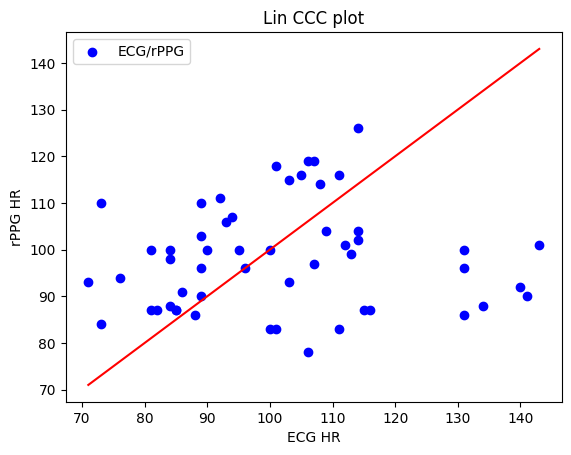

In [ ]:
import matplotlib.pyplot as plt

# Sample data (replace with your own data)
GT = [71, 73, 73, 114, 113, 106, 92, 93, 89, 82, 89, 114, 114, 109, 101, 101, 103, 89, 84, 84, 86, 88, 85, 84, 81, 81, 76, 85, 89, 107, 105, 100, 94, 90, 95, 100, 96, 103, 134, 111, 112, 116, 115, 108, 106, 107, 111, 143, 140, 141, 131, 131, 131]
Average_BPM_new = [93, 110, 84, 104, 99, 78, 111, 106, 103, 87, 110, 126, 102, 104, 118, 83, 115, 90, 100, 98, 91, 86, 87, 88, 87, 100, 94, 87, 96, 119, 116, 100, 107, 100, 100, 83, 96, 93, 88, 116, 101, 87, 87, 114, 119, 97, 83, 101, 92, 90, 100, 96, 86]  # Y-axis values

# Create a scatter plot
plt.scatter(GT, Average_BPM_new, label="ECG/rPPG", color="blue", marker="o")
x_line = np.linspace(min(GT + Average_BPM_new), max(GT + Average_BPM_new), 100)
plt.plot(x_line, x_line, color="red")

# Add labels and title
plt.xlabel("ECG HR")
plt.ylabel("rPPG HR")
plt.title("Lin CCC plot")

# Add a legend (if needed)
plt.legend()

# Show the plot
plt.show()

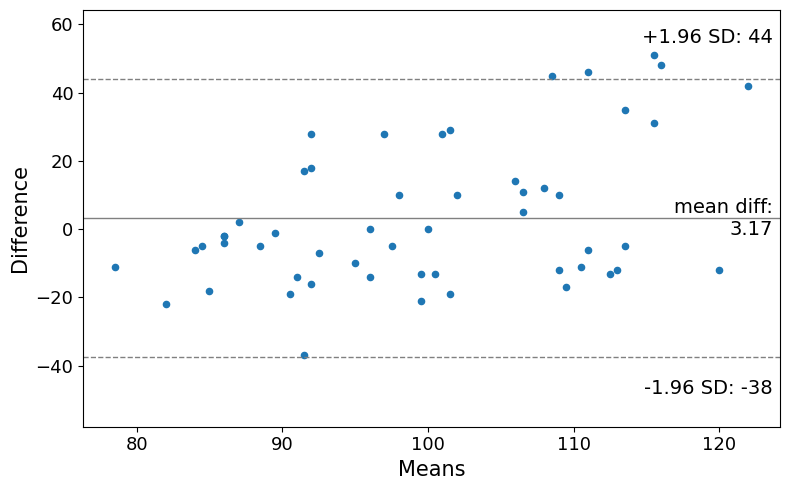

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame({'GT':[71, 73, 73, 114, 113, 106, 92, 93, 89, 82, 89, 114, 114, 109, 101, 101, 103, 89, 84, 84, 86, 88, 85, 84, 81, 81, 76, 85, 89, 107, 105, 100, 94, 90, 95, 100, 96, 103, 134, 111, 112, 116, 115, 108, 106, 107, 111, 143, 140, 141, 131, 131, 131],
                   'Average_BPM_new':[93, 110, 84, 104, 99, 78, 111, 106, 103, 87, 110, 126, 102, 104, 118, 83, 115, 90, 100, 98, 91, 86, 87, 88, 87, 100, 94, 87, 96, 119, 116, 100, 107, 100, 100, 83, 96, 93, 88, 116, 101, 87, 87, 114, 119, 97, 83, 101, 92, 90, 100, 96, 86]
                  })

#create Bland-Altman plot
f, ax = plt.subplots(1, figsize = (8,5))
sm.graphics.mean_diff_plot(df.GT, df.Average_BPM_new, ax = ax)

#display Bland-Altman plot
plt.show()

In [ ]:
import numpy as np

# Your new "GT" values
GT = [
    71, 73, 73, 114, 113, 106, 92, 93, 89, 82, 89, 114, 114, 109, 101, 101, 103, 89, 84, 84, 86, 88, 85, 84, 81, 81,
    76, 85, 89, 107, 105, 100, 94, 90, 95, 100, 96, 103, 134, 111, 112, 116, 115, 106, 107, 111, 143, 140, 141,
    131, 131, 131
]

# Your new "rPPG" values
Average_bpm_new = [
    106, 82, 72, 79, 102, 81, 90, 86, 95, 86, 105, 101, 88, 110, 90, 95, 123, 89, 98, 103, 77, 94, 109, 94, 103,
    95, 80, 85, 95, 64, 73, 86, 70, 77, 78, 80, 82, 93, 81, 73, 77, 85, 76, 90, 87, 88, 99, 110, 98, 96, 92, 90
]

mean_true = np.mean(GT)
# print(mean_true)
mean_pred = np.mean(Average_bpm_new)
# print(mean_pred)
var_true = np.var(GT, ddof=1)
# print(var_true)
var_pred = np.var(Average_bpm_new, ddof=1)
# print(var_pred)
k = []
j = 0
for i in range(52):
  r = GT[i] - mean_true
  f = Average_bpm_new[i] - mean_pred
  l = r*f
  j+=l
  k.append(l)
print(round(j/53,2))
print(round((2*j/53)/(var_true+var_pred+((mean_true-mean_pred)**2)),3))

# # Calculate Lin's CCC
# def lin_concordance_correlation_coefficient(y_true, y_pred):
#     mean_true = np.mean(y_true)
#     mean_pred = np.mean(y_pred)
#     covar = np.cov(y_true, y_pred, ddof=1)[0, 1]
#     # print(covar)
#     var_true = np.var(y_true, ddof=1)
#     # print(var_true)
#     var_pred = np.var(y_pred, ddof=1)
#     # print(var_pred)
#     numerator = 2 * covar
#     denominator = var_true + var_pred + (mean_true - mean_pred) ** 2

#     return numerator / denominator

# ccc = lin_concordance_correlation_coefficient(GT, Average_bpm_new)
# print("Lin's CCC:", ccc)

14.11
0.046


In [ ]:
import openpyxl

# Load the source Excel file with 53 worksheets
source_file_path = "/content/BPM_Brightness-FaceTop_NoSorted.xlsx"
source_workbook = openpyxl.load_workbook(source_file_path)

# Load the target Excel file with one worksheet
target_file_path = "/content/BPM_Brightness-OMIT.xlsx"
target_workbook = openpyxl.load_workbook(target_file_path)

# Get the sheet names from the source workbook
source_sheet_names = source_workbook.sheetnames

# Check if the target workbook already has the desired number of sheets
num_sheets_to_add = len(source_sheet_names) - len(target_workbook.sheetnames)
if num_sheets_to_add > 0:
    # Add blank sheets to the target workbook
    for _ in range(num_sheets_to_add):
        target_workbook.create_sheet()

# Rename the sheets in the target workbook to match the source workbook
for i, sheet_name in enumerate(source_sheet_names):
    target_workbook.worksheets[i].title = sheet_name

# Save the modified target workbook
target_workbook.save("target_with_sheets.xlsx")

In [ ]:
import pandas as pd

# Load the Excel file
excel_file_path = '/content/BPM_Brightness-LGI (2).xlsx'  # Replace with the path to your Excel file
xls = pd.ExcelFile(excel_file_path)

# Initialize a dictionary to store means
mean_dict = {}

# Iterate through all worksheets in the Excel file
for sheet_name in xls.sheet_names:
    # Read the sheet into a DataFrame
    df = pd.read_excel(excel_file_path, sheet_name=sheet_name)

    # Calculate the mean of the 'BPM' column
    mean_value = df['BPM'].mean()
    # print(mean_value)
    # Store the mean in the dictionary with the sheet name as the key
    mean_dict[sheet_name] = mean_value

# Create a DataFrame from the mean dictionary
mean_df = pd.DataFrame(list(mean_dict.items()), columns=['Sheet Name', 'Mean BPM'])

# Save the mean DataFrame to 'BPM.csv'
output_csv_path = 'BPM.csv'
mean_df.to_csv(output_csv_path, index=False)

81.72966452205883
94.8529411764706
73.88844209558823
92.99172794117646
101.2982536764706
85.70197610294117
101.03113511029412
95.80939797794117
94.58582261029412
82.26390165441177
93.06927849264706
124.59788602941177
94.62028952205883
97.91187959558823
112.98253676470588
78.77412683823529
108.75172334558823
70.65716911764706
81.47058823529412
76.00980392156863
78.19607843137256
80.96078431372548
73.16666666666667
69.62745098039215
69.31372549019608
78.8529411764706
75.31372549019608
72.62745098039215
74.72549019607843
75.96078431372548
86.69607843137256
69.00980392156863
75.57843137254902
77.59803921568627
77.33333333333333
71.19607843137256
77.99019607843137
82.54901960784314
76.49019607843137
83.62745098039215
78.83333333333333
77.18627450980392
77.26470588235294
83.8921568627451
70.70588235294117
72.96078431372548
76.00980392156863
71.1078431372549
77.20588235294117
71.08823529411765
68.31372549019608
81.36274509803921
73.79411764705883


In [ ]:
import numpy as np

# True values (GT) and predicted values (Mean BPM)
true_values = np.array([71, 73, 73, 114, 113, 106, 92, 93, 89, 82, 89, 114, 114, 109, 101, 101, 103, 89, 84, 84, 86, 88, 85, 84, 81, 81, 76, 85, 89, 107, 105, 100, 94, 90, 95, 100, 96, 103, 134, 111, 112, 116, 115, 108, 106, 107, 111, 143, 140, 141, 131, 131, 131])
predicted_values = np.array([81.72966452, 94.85294118, 73.8884421, 92.99172794, 101.2982537, 85.7019761, 101.0311351, 95.80939798, 94.58582261, 82.26390165, 93.06927849, 124.597886, 94.62028952, 97.9118796, 112.9825368, 78.77412684, 108.7517233, 70.65716912, 81.47058824, 76.00980392, 78.19607843, 80.96078431, 73.16666667, 69.62745098, 69.31372549, 78.85294118, 75.31372549, 72.62745098, 74.7254902, 75.96078431, 86.69607843, 69.00980392, 75.57843137, 77.59803922, 77.33333333, 71.19607843, 77.99019608, 82.54901961, 76.49019608, 83.62745098, 78.83333333, 77.18627451, 77.26470588, 83.89215686, 70.70588235, 72.96078431, 76.00980392, 71.10784314, 77.20588235, 71.08823529, 68.31372549, 81.3627451, 73.79411765])

# Calculate percent errors
percent_errors = abs(((true_values - predicted_values) / true_values) * 100)

# Calculate median error
median_error = np.median(percent_errors)

# Calculate mean absolute error (MAE)
mae = np.mean(np.abs(percent_errors))

# Calculate root mean squared error (RMSE)
rmse = np.sqrt(np.mean(percent_errors**2))

print("Percent Errors:", percent_errors)
print("Median Error:", median_error)
print("MAE:", mae)
print("RMSE:", rmse)

Percent Errors: [15.11220355 29.93553586  1.21704397 18.42830882 10.3555277  19.14907915
  9.8164512   3.02085804  6.27620518  0.32183128  4.57222302  9.29639123
 16.99974604 10.17258752 11.86389782 22.00581501  5.58419738 20.60992234
  3.01120448  9.51213819  9.07432741  7.99910874 13.92156862 17.1101774
 14.4274994   2.6506899   0.90299278 14.55594002 16.03877506 29.00861279
 17.43230626 30.99019608 19.59741344 13.77995642 18.59649123 28.80392157
 18.76021242 19.85532077 42.91776412 24.65995407 29.61309524 33.46010818
 32.81329923 22.32207698 33.29633741 31.81235111 31.52269917 50.27423557
 44.85294118 49.58281185 47.85211795 37.89103427 43.66861248]
Median Error: 18.4283088245614
MAE: 20.326530507540895
RMSE: 24.359867924906542


In [ ]:
import numpy as np
import pandas as pd

# True values (GT) and predicted values (Mean BPM)
true_values = np.array([71, 73, 73, 114, 113, 106, 92, 93, 89, 82, 89, 114, 114, 109, 101, 101, 103, 89, 84, 84, 86, 88, 85, 84, 81, 81, 76, 85, 89, 107, 105, 100, 94, 90, 95, 100, 96, 103, 134, 111, 112, 116, 115, 108, 106, 107, 111, 143, 140, 141, 131, 131, 131])
mean_bpm_values = np.array([
    81, 96, 75, 91, 101, 86, 101, 93, 94, 81, 91, 124, 94, 98, 113, 78, 108, 72, 79, 77,
    77, 80, 72, 73, 67, 86, 76, 73, 74, 60, 71, 72, 75, 79, 81, 71, 81, 84, 76, 88, 74,
    77, 70, 82, 63, 74, 77, 71, 76, 71, 69, 82, 73
])
# Calculate percent errors
percent_errors = abs(((true_values - mean_bpm_values) / true_values) * 100)

# Calculate median error
median_error = np.median(percent_errors)

# Calculate mean absolute error (MAE)
mae = np.mean(np.abs(percent_errors))

# Calculate root mean squared error (RMSE)
rmse = np.sqrt(np.mean(percent_errors**2))

# Create a DataFrame
df = pd.DataFrame({
    "Percent Errors": percent_errors,
    "Median Error": median_error,
    "MAE": mae,
    "RMSE": rmse
})

# Specify the CSV file path
csv_file_path = "ErrorMetrics.csv"

# Save the DataFrame to a CSV file
df.to_csv(csv_file_path, index=False)

print("Error metrics saved to", csv_file_path)

Error metrics saved to ErrorMetrics.csv


In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
percent_errors = np.array([15.11, 29.94, 1.22, 18.43, 10.36, 19.15, 9.82, 3.02, 6.28, 0.32, 4.57, 9.30, 17.00, 10.17, 11.86, 22.01, 5.58, 20.61, 3.01, 9.51, 9.07, 8.00, 13.92, 17.11, 14.43, 2.65, 0.90, 14.56, 16.04, 29.01, 17.43, 30.99, 19.60, 13.78, 18.60, 28.80, 18.76, 19.86, 42.92, 24.66, 29.61, 33.46, 32.81, 22.32, 33.30, 31.81, 31.52, 50.27, 44.85, 49.58, 47.85, 37.89, 43.67])
mae = mean_absolute_error(np.zeros_like(percent_errors), percent_errors)
rmse = np.sqrt(mean_squared_error(np.zeros_like(percent_errors), percent_errors))
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Square Error (RMSE):", rmse)

Mean Absolute Error (MAE): 20.326415094339627
Root Mean Square Error (RMSE): 24.359589797333197


In [ ]:
import pandas as pd

# Load the Excel file into a pandas DataFrame
file_path = '/content/BPM_Brightness-FaceTop_NoSorted (1).xlsx'  # Replace with the path to your Excel file
df = pd.read_excel(file_path, sheet_name=None)  # Read all sheets into a dictionary of DataFrames

# Iterate through each sheet and convert 'BPM' column to integers
for sheet_name, sheet_data in df.items():
    if 'BPM' in sheet_data.columns:
        df[sheet_name]['BPM'] = df[sheet_name]['BPM'].astype(int)

# Save the modified DataFrame back to the Excel file
with pd.ExcelWriter(file_path, engine='openpyxl') as writer:
    for sheet_name, sheet_data in df.items():
        sheet_data.to_excel(writer, sheet_name=sheet_name, index=False)